In [1]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   
from scipy.stats import spearmanr
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pylab
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('mypresentation')

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

In [3]:
from load_data import *

smt contain info about all z=0 CLs' mass at different epoch
 merger (calc by r200m) contain T/F info about whether CL experienced merger after a=?
groupbyz0id.get_group(CLno) gives all info for CLno mass(z)
allelldata, 85*15, 85 CLs, [0] is CL id, following 3D gas ell at rlist r500c
e.g. allelldata[:,0] gives all CLids, in increasing number order
 allelldata[?,4] gives CL? ell at rlist[4]=0.3 r500c


In [4]:
print allz0id
print np.unique(df_new['mergers']['z0_parent_id'])
print set(allz0id)-set(np.unique(df_new['mergers']['z0_parent_id']))
noinfoCL=list(set(allz0id)-set(np.unique(df_new['mergers']['z0_parent_id'])))
print noinfoCL


[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  229.  248.  284.  298.  434.  471.
  732.]
[  1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  19  21
  23  25  26  27  29  31  32  33  34  35  39  42  44  45  49  50  53  54
  55  59  61  63  64  65  66  68  69  71  73  74  77  78  79  80  81  82
  83  85  86  88  91  96  98 104 106 108 118 125 131 132 135 138 140 146
 153 156 161 175 201 217 221 229 248 250 284 298 314 434 471 732]
set([8.0, 200.0, 100.0, 149.0, 223.0])
[8.0, 200.0, 100.0, 149.0, 223.0]


In [5]:
# allelldata[:,9]
print rlist[9]
print np.where(allelldata[:,0]==21)
print allelldata[17,9]

0.8
(array([17]),)
0.90023


In [6]:
print np.where(allelldata[:,0]==21)

(array([17]),)


In [7]:
# df_new['mergers'][(df_new['mergers']['merger_aexp']>0.7)&\
#                    (df_new['mergers']['z0_parent_id']==21)]

#### Calculate Gamma over a specific time range

In [8]:
a=0.7
acutgamma=a
Gamma=calc_Gamma(acutgamma,Mdef='M_total_200m')

default definition is M_total_200m


In [9]:
# print [allelldata[:,i][allelldata[:,0]==82][0] for i in range(len(rlist))][1:]
# plt.plot([allelldata[:,i][allelldata[:,0]==61][0] for i in range(len(rlist))][1:])
# plt.show()

In [10]:
print M500c[np.where(allz0id==21)]
print Gamma[np.where(allz0id==98)]

[  4.25800000e+14]
[ 3.34882867]


### plot radius vs. ell

In [11]:
# mask=[]
# gammabins=np.arange(Gamma.min(),Gamma.max(),1.)
# for i in range(len(gammabins)-1):
#     mask.append((Gamma<gammabins[i+1])&(Gamma>gammabins[i]))
# print len(mask)

# cnorm_gamma=colors.Normalize(vmin=Gamma.min(),vmax=Gamma.max())
# scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# for jm in range(len(mask)):
#     med=[];up=[];down=[]
#     print 'sample size:',np.sum(mask[jm])
#     color=scalarmap_gamma.to_rgba(jm+1)
#     for i in range(1,len(rlist)):
#         tmpdata=allelldata[mask[jm]][:,i]
#         ellmed=np.percentile(tmpdata[~np.isnan(tmpdata)],50)
#         ellup=np.percentile(tmpdata[~np.isnan(tmpdata)],88)
#         elldown=np.percentile(tmpdata[~np.isnan(tmpdata)],12)
#         med.append(ellmed); up.append(ellup); down.append(elldown)
#     med=np.array(med); up=np.array(up); down=np.array(down)
#     print len(med),len(up),len(down)
#     plt.errorbar(rlist[1:],med,yerr=[med-down,up-med],c=color,label=r'$\Gamma_{200m}$ '+str(gammabins[jm])+'-'+str(gammabins[jm+1]))
# plt.legend()
# plt.xlabel('r/r500c')
# plt.ylabel('c/a')
# plt.title(r'3D gas ellipticity $\Gamma$ (a='+str(np.around(a,decimals=2))+'~1)')
# plt.savefig('figures/gamma_'+str(a)+'_3D_gas_ell_vs_r_r500c_errorbar.eps')

# plt.show()

#### Plot Spearmann coefficient:

### whole sample 
filter_whole

In [12]:
filt=(allz0id==np.array(noinfoCL))
print filt
for unid in noinfoCL:
    filt=filt|(allz0id==unid)
filter_whole=~filt
print filter_whole
print allz0id[filter_whole]


False
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True]
[   1.    2.    3.    4.    5.    6.    7.    9.   10.   11.   13.   14.
   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.   32.
   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.   55.
   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.   79.
   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  104.  106.
  108.  125.  131.  132.  135.  140.  146.  153.  156.  161.  175.  201.
  217.  229.  248.  284.  298.  434. 

/Users/hqchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [13]:
# df_new['mergers'][(df_new['mergers']['mass_ratio']>0.33) & (df_new['mergers']['merger_aexp']>0.7)]

In [63]:
print allz0id[filter_relax]

[   1.    2.    3.    6.   14.   15.   16.   21.   26.   27.   29.   32.
   39.   42.   44.   54.   65.   69.   82.   83.   85.   86.  104.  135.
  140.  175.  229.  732.]


In [44]:
# majormergerid=np.unique(df_new['mergers']['z0_parent_id'][(df_new['mergers']['impact_parameter']<500)\
#                   & (df_new['mergers']['merger_aexp']>0.7) &\
#                    (df_new['mergers']['mass_ratio']<0.1)])

In [58]:
df_new['mergers'][df_new['mergers']['z0_parent_id']==82]

,z0_parent_id,merger_aexp,main_line_id,merging_id,mass_ratio,impact_parameter,track_merging_aexp,num_shared_particles
2306,82,0.9510,132,667,0.053840,465.462720,0.9510,6238
2307,82,0.8264,40,141,0.108801,423.931432,0.8514,21265
2308,82,0.8264,40,141,0.108801,423.931432,0.8264,3196
2309,82,0.8011,59,484,0.045131,347.322651,0.8011,5926
2310,82,0.7263,85,273,0.109291,601.490396,0.7511,13595
2311,82,0.7511,64,1272,0.078931,216.581621,0.7511,7202
2312,82,0.7511,64,3221,0.016625,372.247915,0.7511,1777
2313,82,0.7263,85,273,0.109291,601.490396,0.7263,1316
2314,82,0.6750,18,4867,0.016846,256.207087,0.6750,1214
2315,82,0.6503,23,2893,0.029820,790.324514,0.6503,189


In [59]:
df_new['mergers'][df_new['mergers']['z0_parent_id']==21]

,z0_parent_id,merger_aexp,main_line_id,merging_id,mass_ratio,impact_parameter,track_merging_aexp,num_shared_particles
724,21,0.9510,22,496,0.018167,167.450405,0.9510,6570
725,21,0.8264,13,1945,0.020785,178.516613,0.8264,6481
726,21,0.8011,13,350,0.025856,810.247883,0.8011,365
727,21,0.8011,13,2116,0.012483,365.425406,0.8011,887
728,21,0.7511,11,1595,0.058702,726.820981,0.7511,18887
729,21,0.7263,25,1349,0.052505,907.434218,0.7263,2231
730,21,0.7015,12,446,0.045200,605.177671,0.7015,12051
731,21,0.6750,28,66,0.024979,393.600755,0.6750,497
732,21,0.6503,11,919,0.010599,805.471454,0.6503,2691
733,21,0.6259,7,368,0.021374,618.932667,0.6259,4439


In [51]:
print majormergerid

[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]


#### filter major minor merger

In [50]:
Gammadef='200m'
acutgamma=0.7
Gamma=calc_Gamma(acutgamma,Mdef='M_total_'+Gammadef)

acutmerger=0.7 # within 0.7-1 no major merger

# mr=3 #merger mass ratio
# selectid=merger['z0_parent_id'][~(merger['1:'+str(mr)+' after a='+str(acutmerger)])]
# selectid=list(set(selectid))

majormergerid=np.unique(df_new['mergers']['z0_parent_id']\
                [(df_new['mergers']['mass_ratio']>0.33) & (df_new['mergers']['merger_aexp']>0.7)])

minormajormergerid=np.unique(df_new['mergers']['z0_parent_id']\
                [(df_new['mergers']['mass_ratio']>0.16) & (df_new['mergers']['merger_aexp']>0.7)])
minormergerid=set(minormajormergerid)-set(majormergerid)

print majormergerid

#selectid: without major merger (>1:3)
selectid=list(set(allz0id)-set(majormergerid))

#sid: very smooth accretion, without even minor merger (1:6)
sid=set(allz0id)-set(minormajormergerid)

default definition is M_total_200m
[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]


In [22]:
sm=np.unique(df_new['mergers']['z0_parent_id']\
                [(df_new['mergers']['mass_ratio']>0.1) & (df_new['mergers']['merger_aexp']>0.7)])

In [79]:
df_new['mergers'][(df_new['mergers']['mass_ratio']>0.33) & (df_new['mergers']['merger_aexp']>0.1)\
                 &(df_new['mergers']['z0_parent_id']==2)]

,z0_parent_id,merger_aexp,main_line_id,merging_id,mass_ratio,impact_parameter,track_merging_aexp,num_shared_particles
55,2,0.6259,15,149,0.719443,1063.831004,0.7263,75432
56,2,0.6259,15,149,0.719443,1063.831004,0.7015,45249
57,2,0.6259,15,149,0.719443,1063.831004,0.6750,53997
58,2,0.6259,15,149,0.719443,1063.831004,0.6503,65455
59,2,0.6259,15,149,0.719443,1063.831004,0.6259,46772
61,2,0.6001,8,123,0.733623,1237.573086,0.6001,25034
62,2,0.5753,5,203,0.664293,1435.556219,0.5753,3089
65,2,0.5517,12,943,0.624312,1760.516034,0.5517,607
70,2,0.5260,1,35,0.402899,279.965623,0.5260,23241
75,2,0.4252,39,41,0.871232,396.259388,0.4252,25162


In [59]:
df_new['mergers'][(df_new['mergers']['mass_ratio']>0.1) & (df_new['mergers']['merger_aexp']>0.7)\
                 &(df_new['mergers']['z0_parent_id']==)]

,z0_parent_id,merger_aexp,main_line_id,merging_id,mass_ratio,impact_parameter,track_merging_aexp,num_shared_particles
3532,248,0.7511,522,278,0.246938,290.147008,0.7511,30078
3535,248,0.7263,101,547,0.191541,297.360887,0.7263,1344


default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m


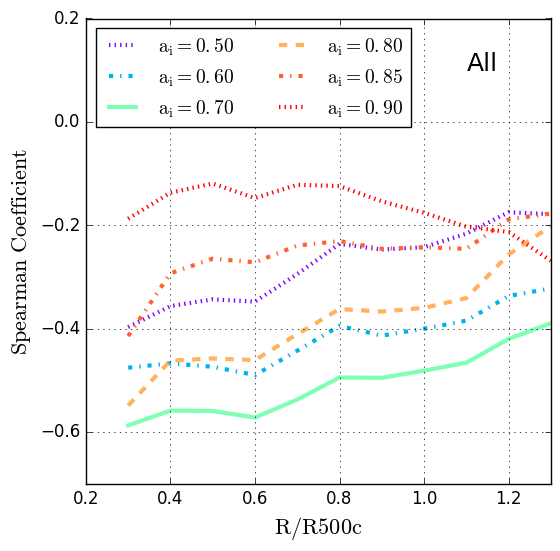

In [24]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# lsty=[':','-.','--','-','-','--','-.',':']
# lwd=[2,2,2,2,1.5,1.5,1.5,1.5]
lsty=[':','-.','-','--','-.',':']
for ig,spco_acutgamma in enumerate([0.5,0.6,0.7,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma,Mdef='M_total_200m')[filter_whole]
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[filter_whole][:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
#     r'$\Gamma_{200m} \left(a=%.2f - 1\right)$'%np.around(a,decimals=2)
#     plt.plot(r_spco,spco,label=r'$\rm a_i=%.2f$'%spco_acutgamma,lw=3,ls=lsty[ig],c=color)
    plt.plot(r_spco,spco,label=r'$ \rm a_i=%.2f $'%spco_acutgamma,lw=3,ls=lsty[ig],c=color)
leg = plt.legend(ncol=2,loc='upper left',fontsize=14,frameon=True)
# leg.set_title(r'$\Gamma_{200m} \rm \ definition$', prop = {'size':'xx-large'})
plt.annotate('All',(1.1,0.1),fontsize=18)
# plt.title(r'$\rm all \ clusters$')
plt.xlabel(r'$\rm R/R500c$')
plt.ylabel(r'$\rm Spearman \ Coefficient$')
# plt.ylabel('spearman coef (3D ell vs Gamma)')

plt.xlim([0.2,1.3])
plt.ylim([-0.7,0.2])
plt.grid()

plt.savefig('spearman_coef_R_r200m.png')
plt.savefig('spearman_coef_R_r200m.eps')

plt.show()

### exclude major mergers

In [13]:
filt=(allz0id==majormergerid[0])
for unid in list(majormergerid)+noinfoCL:
    filt=filt|(allz0id==unid)
filter_relax=~filt
print filter_relax

[ True  True  True False False  True False False  True False False  True
  True  True  True False  True  True False False  True  True  True  True
  True  True False False  True  True  True False False False False  True
 False  True False  True  True False  True  True  True  True  True False
 False False False  True  True  True  True  True False False  True False
  True  True  True  True False  True  True  True False False False False
  True  True False  True False False  True  True False False False False
  True]


In [26]:
# print majormergerid
1./0.7-1

0.4285714285714286

default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m
default definition is M_total_200m


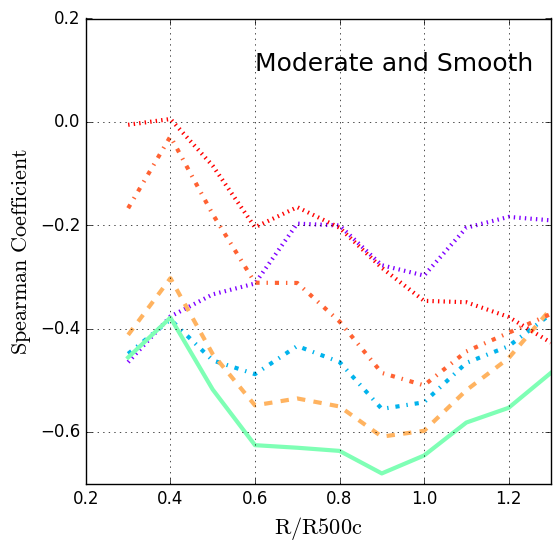

In [47]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# lsty=[':','-.','--','-','-','--','-.',':']
# lwd=[2,2,2,2,1.5,1.5,1.5,1.5]
lsty=[':','-.','-','--','-.',':']
for ig,spco_acutgamma in enumerate([0.5,0.6,0.7,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma,Mdef='M_total_200m')[filter_relax]
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[filter_relax][:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
#     plt.plot(r_spco,spco,label=str(spco_acutgamma),ls=lsty[ig],c=color)
    plt.plot(r_spco,spco,ls=lsty[ig],c=color,lw=3)
leg = plt.legend(ncol=2)
# leg.set_title(r'$\Gamma_{200m} \rm \ definition$', prop = {'size':'x-large'})
plt.annotate('Moderate and Smooth',(0.6,0.1),fontsize=18)


# plt.title(r'$\rm exclude \  major \ merger \ clusters$')
plt.xlabel(r'$\rm R/R500c$')
plt.ylabel(r'$\rm Spearman \ Coefficient$')
# plt.ylabel('spearman coef (3D ell vs Gamma)')

plt.xlim([0.2,1.3])
plt.ylim([-0.7,0.2])
plt.grid()

# plt.savefig('spearman_coef_R_r200m_ex_majormerger.png')
# plt.savefig('spearman_coef_R_r200m_ex_majormerger.eps')

plt.show()

### exclude mergers

In [65]:
print filter_relax

[ True  True  True False False  True False False False False False False
  True  True  True False False  True False False  True  True  True False
  True False False False  True  True  True False False False False  True
 False False False False  True False False  True False False False False
 False False False  True  True  True  True False False False False False
  True False False False False False  True  True False False False False
 False  True False False False False  True False False False False False
  True]


In [69]:
print cl
print rlist

[ 1.       0.52999  0.57953  0.57241  0.56678  0.58595  0.64025  0.68834
  0.69661  0.71915  0.76664  0.79115  0.79594  0.79514  0.79942]
[0, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]


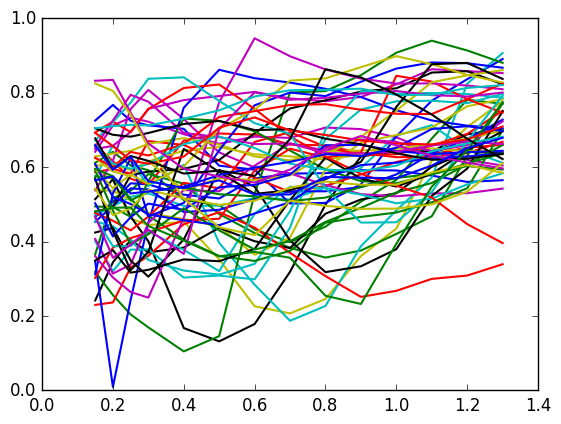

In [71]:
for cl in allelldata[~filter_relax]:
    plt.plot(rlist[1:],cl[1:])
plt.show()

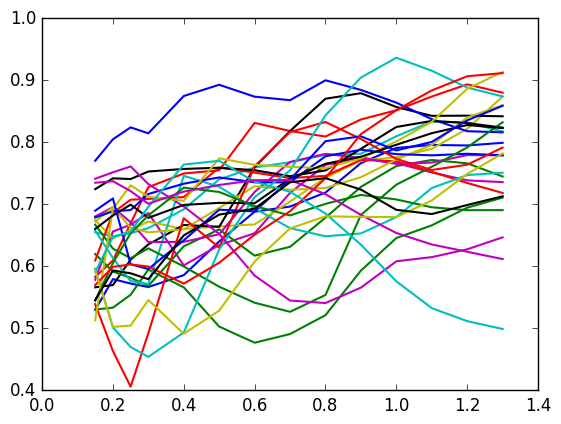

In [70]:
for cl in allelldata[filter_relax]:
    plt.plot(rlist[1:],cl[1:])
plt.show()

In [64]:
filt=(allz0id==minormajormergerid[0])
for unid in list(minormajormergerid)+noinfoCL:#+[8,200,100,223]:
    filt=filt|(allz0id==unid)
filter_relax=~filt
print sum(filter_relax)
print filter_relax, allz0id

28
[ True  True  True False False  True False False False False False False
  True  True  True False False  True False False  True  True  True False
  True False False False  True  True  True False False False False  True
 False False False False  True False False  True False False False False
 False False False  True  True  True  True False False False False False
  True False False False False False  True  True False False False False
 False  True False False False False  True False False False False False
  True] [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  22

default definition is M_total_200m
SpearmanrResult(correlation=-0.38149972632731255, pvalue=0.045160296096053106)
SpearmanrResult(correlation=-0.18390804597701149, pvalue=0.34885827222813293)
SpearmanrResult(correlation=-0.10618500273672687, pvalue=0.59072523516915931)
SpearmanrResult(correlation=0.025725232621784347, pvalue=0.89661381460959777)
SpearmanrResult(correlation=0.15927750410509031, pvalue=0.41818205735191605)
SpearmanrResult(correlation=0.09414340448823208, pvalue=0.6337121100027221)
SpearmanrResult(correlation=-0.013136288998357963, pvalue=0.94710375477246356)
SpearmanrResult(correlation=-0.070060207991242476, pvalue=0.72314596046837054)
SpearmanrResult(correlation=-0.027371014352392371, pvalue=0.89003801554727091)
SpearmanrResult(correlation=0.012588943623426383, pvalue=0.94930491103293768)
SpearmanrResult(correlation=0.034482758620689655, pvalue=0.86170978878804561)
default definition is M_total_200m
SpearmanrResult(correlation=-0.12370005473453749, pvalue=0.530572483885

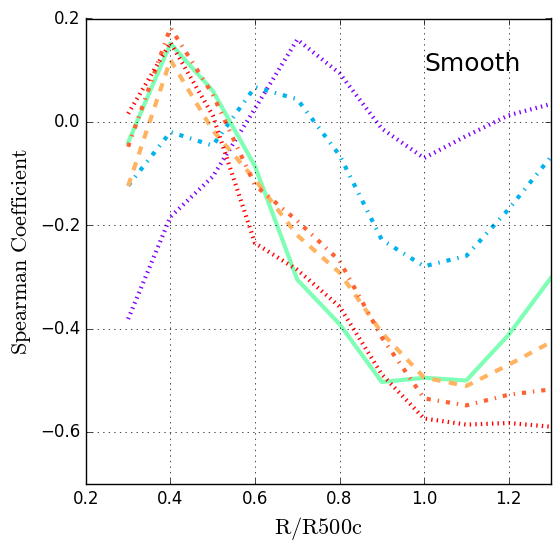

In [29]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# lsty=[':','-.','--','-','-','--','-.',':']
# lwd=[2,2,2,2,1.5,1.5,1.5,1.5]
lsty=[':','-.','-','--','-.',':']
for ig,spco_acutgamma in enumerate([0.5,0.6,0.7,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma,Mdef='M_total_200m')[filter_relax]
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[filter_relax][:,spco_ir]
        r_spco.append(rlist[spco_ir])
        print spearmanr(spco_Gamma,spco_ell_r500c)
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.plot(r_spco,spco,lw=3,ls=lsty[ig],c=color)
#         plt.plot(r_spco,spco,label=str(spco_acutgamma),ls=lsty[ig],c=color)

# leg = plt.legend(ncol=2)
# leg.set_title(r'$\Gamma_{200m} \rm \ definition$', prop = {'size':'x-large'})

# plt.title(r'$\rm exclude \   all \ merger \ clusters$')
plt.xlabel(r'$\rm R/R500c$')
plt.ylabel(r'$\rm Spearman \ Coefficient$')
# plt.ylabel('spearman coef (3D ell vs Gamma)')
plt.annotate('Smooth',(1.0,0.1),fontsize=18)


plt.xlim([0.2,1.3])
plt.ylim([-0.7,0.2])
plt.grid()

plt.savefig('spearman_coef_R_r200m_ex_all_merger.png')
plt.savefig('spearman_coef_R_r200m_ex_all_merger.eps')

plt.show()

default definition is M_total_200m
[-0.10148139 -0.00532213  0.03179555 -0.0024896   0.04878749  0.04884389
  0.07041136  0.09505963  0.10216591  0.19983041  0.17949139]
default definition is M_total_200m
[-0.11347906  0.0778661  -0.0852938  -0.08895882 -0.00488272 -0.00898634
  0.06096093  0.05210599  0.12213688  0.12240153  0.11481958]
default definition is M_total_200m
[-0.04698831 -0.05144233 -0.09482582 -0.12094016 -0.06487218 -0.03974724
  0.02354148 -0.05323371 -0.06819892 -0.02213164  0.01829076]
default definition is M_total_200m
[-0.17626785 -0.17256828 -0.09648919 -0.1994965  -0.21645028 -0.13314641
 -0.06533757 -0.16334792  0.03646439 -0.14478778 -0.06815694]
default definition is M_total_200m
[-0.19967168 -0.12624998 -0.18989592 -0.12871937 -0.13968376 -0.14813295
 -0.12653553 -0.11628734 -0.02767196 -0.02865898  0.02874499]
default definition is M_total_200m
[-0.1498153   0.04208899  0.03526869 -0.03362517  0.05659913 -0.01670337
 -0.00826288 -0.04113599 -0.0600647   0.12

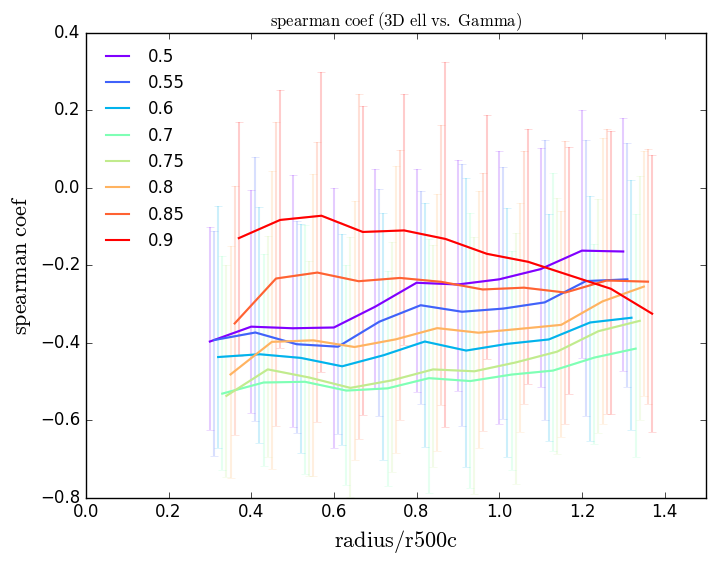

In [30]:
plt.figure(figsize=(8,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    spco_up=[];spco_lo=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
        tmpspearmanr=[]
        for j in range(500):
            index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
            subsampleGamma=[spco_Gamma[i] for i in index]
            subsampleell=[spco_ell_r500c[i] for i in index]
            tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
        spco_up.append(max(tmpspearmanr)),spco_lo.append(min(tmpspearmanr))
    spco=np.array(spco);spco_up=np.array(spco_up);spco_lo=np.array(spco_lo);r_spco=np.array(r_spco)
    print spco_up
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.errorbar(r_spco+0.01*irun,spco,yerr=[spco-spco_lo,spco_up-spco],alpha=0.2,c=color)
    


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    r_spco=np.array(r_spco)
    plt.plot(r_spco+0.01*irun,spco,c=color,label=str(spco_acutgamma))
    plt.legend()
plt.xlim([0,1.5])
plt.ylim([-0.8,0.4])


plt.xlabel(r'$\rm radius/r500c$')
plt.ylabel(r'$\rm spearman \ coef$')
plt.title(r'$\rm spearman \ coef \ (3D \ ell \ vs. \ Gamma)$')
plt.savefig('spearman_coef_err.png')
plt.savefig('spearman_coef_err.eps')
plt.savefig('spearman_coef_err.pdf')
plt.show()

#### plot Gamma vs. c/a at certain r

In [31]:
# plt.scatter(Gamma,ell_r500c)
# for i, txt in enumerate(allz0id):
#     txt=str(int(txt))
#     plt.annotate(txt, (Gamma[i],ell_r500c[i]))
# plt.ylim([0.2,1])
# plt.xlim([0,max(Gamma)+0.5])
# plt.xlabel(r'$\Gamma_{200m} \left(a=%.2f - 1\right)$'%np.around(a,decimals=2))
# plt.ylabel(r'$c/a \ \left(r=%.2f  \ r_{500c}\right)$'%rlist[ir])
# plt.annotate('spearmanr='+str(np.around(spearmanr(Gamma,ell_r500c)[0],4)),(0,0.3))

# print pearsonr(Gamma,ell_r500c)
# print spearmanr(Gamma,ell_r500c)


# tmpspearmanr=[]
# for j in range(500):
#     index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
#     subsampleGamma=[Gamma[i] for i in index]
#     subsampleell=[ell_r500c[i] for i in index]
#     # print 'quiet Gamma~ell pearson',pearsonr(subsampleGamma,subsampleell)
#     tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
# print max(tmpspearmanr),min(tmpspearmanr)
# plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# # plt.savefig('Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
# plt.savefig('tmp.eps')

# plt.show()



In [14]:
print majormergerid

[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]


In [15]:
# mergerdef='200m'
# merger=pd.read_csv('../data/mergers_'+mergerdef+'.csv')

0.0877119685281
0.0690114077871


In [35]:
ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

0.8


In [98]:
print sid

set([1.0, 2.0, 3.0, 6.0, 135.0, 8.0, 140.0, 14.0, 15.0, 16.0, 21.0, 26.0, 27.0, 29.0, 32.0, 39.0, 42.0, 44.0, 175.0, 54.0, 65.0, 69.0, 200.0, 82.0, 83.0, 85.0, 86.0, 732.0, 223.0, 100.0, 229.0, 104.0, 149.0])


all sample SpearmanrResult(correlation=-0.49200703537228846, pvalue=1.7335711050369826e-06)
without major merger SpearmanrResult(correlation=-0.48597000483792935, pvalue=0.00022514148714747892)
[1.0, 2.0, 3.0, 132.0, 6.0, 135.0, 8.0, 9.0, 140.0, 13.0, 14.0, 15.0, 16.0, 19.0, 21.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 39.0, 42.0, 44.0, 175.0, 54.0, 73.0, 59.0, 63.0, 65.0, 68.0, 69.0, 71.0, 200.0, 201.0, 77.0, 82.0, 83.0, 85.0, 86.0, 88.0, 732.0, 223.0, 98.0, 100.0, 229.0, 104.0, 161.0, 106.0, 108.0, 248.0, 125.0, 149.0]


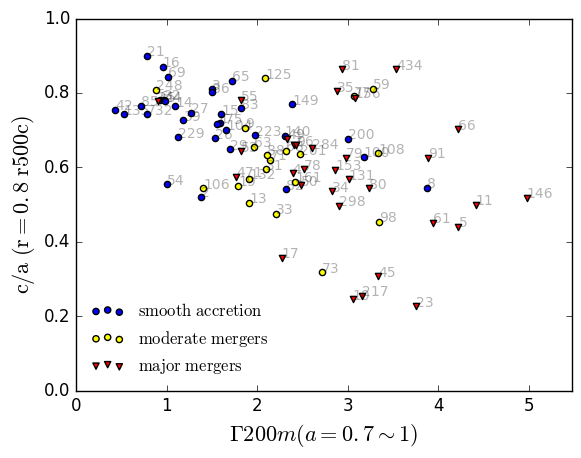

all Gamma~ell pearson (-0.48906235212932492, 2.0412574655123173e-06)
all Gamma~ell  SpearmanrResult(correlation=-0.49200703537228846, pvalue=1.7335711050369826e-06)
quiet Gamma~ell pearson (-0.45484768978724821, 0.00062227065484677334)
quiet Gamma~ell  SpearmanrResult(correlation=-0.48597000483792935, pvalue=0.00022514148714747892)


In [36]:
from scipy import misc
import glob
import matplotlib.image as mpimg

# very smooth accretion
silentGamma=[]
silentell=[]

# without major mergers
quietGamma=[]
quietell=[]

# major merger clusters
vioGamma=[]
vioell=[]

# minor merger clusters
moderateGamma=[]
moderateell=[]

for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid :
        quietGamma.append(Gamma[i])
        quietell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.3)
        if ids in sid:
            silentGamma.append(Gamma[i])
            silentell.append(ell_r500c[i])
        else:
            moderateGamma.append(Gamma[i])
            moderateell.append(ell_r500c[i])
    else:
        vioGamma.append(Gamma[i])
        vioell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.3)
    
plt.ylim([0.,1])
plt.xlim([0,max(Gamma)+0.5])

# plt.scatter(silentGamma,silentell,c='blue',label=r'$\rm no >1:%d \ merger \ after \ a=%.2f$'%(smr,acutmerger),alpha=1.,s=20)
plt.scatter(silentGamma,silentell,c='blue',label=r'$\rm smooth \ accretion$',alpha=1.,s=20)

# plt.scatter(quietGamma,quietell,c='yellow',label=r'$\rm have 1:%d \sim 1:%d \ merger \ after \ a=%.2f$'%(mr,smr,acutmerger),alpha=1.,s=20)
plt.scatter(moderateGamma,moderateell,c='yellow',label=r'$\rm moderate \ mergers $',alpha=1.,s=20)

# plt.scatter(vioGamma,vioell,c='red',label=r'$\rm have >1:%d \ merger \ after \ a=%.2f$'%(mr,acutmerger),marker='v')
plt.scatter(vioGamma,vioell,c='red',label=r'$\rm major \ mergers$',marker='v')


print 'all sample', spearmanr(Gamma,ell_r500c)
print 'without major merger', spearmanr(quietGamma,quietell)


plt.xlabel(r"$\Gamma{0}(a={1}\sim 1)$".format(Gammadef,np.around(a,decimals=2)))
plt.ylabel(r'$\rm c/a \ (r='+str(rlist[ir])+'\ r500c)$')
leg=plt.legend(loc='lower left')

# leg.set_title(r'$\rm {0}\  cut$'.format(mergerdef), prop = {'size':'x-large'})
print selectid

# tmpspearmanr=[]
# print len(selectid),int(len(selectid)*0.9)
# for j in range(500):
#     index=np.random.choice(len(selectid),int(len(selectid)*0.9))
#     subsampleGamma=[quietGamma[i] for i in index]
#     subsampleell=[quietell[i] for i in index]
#     tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
# print max(tmpspearmanr),min(tmpspearmanr)
# plt.annotate('quiet spearmanr='+str(np.around(spearmanr(quietGamma,quietell)[0],4)),(0,0.3))
# plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# plt.savefig('quiet_'+str(mr)+'_Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
# plt.savefig('tmp.eps')
# plt.savefig('Gamma'+str(acutgamma)+'ell'+str(rlist[ir])+'_sp_'+str(np.around(spearmanr(quietGamma,quietell)[0],4))+'.png')

# plt.savefig('different_merger_cut_'+str(rlist[ir])+'_.png')
plt.savefig('different_merger_cut_'+str(rlist[ir])+'.eps')


plt.show()
print 'all Gamma~ell pearson',pearsonr(Gamma,ell_r500c)
print 'all Gamma~ell ',spearmanr(Gamma,ell_r500c)
print 'quiet Gamma~ell pearson',pearsonr(quietGamma,quietell)
print 'quiet Gamma~ell ',spearmanr(quietGamma,quietell)

In [37]:
print len(majormergerid)


36


### load new observables

In [10]:
z0idnew=[]

for i,idnew in enumerate(ids_90):
    if idnew in allz0id[filter_whole]:
        z0idnew.append(idnew)


print z0idnew
Gammadef='200m'
acutgamma=0.7
Gamma=calc_Gamma(acutgamma,Mdef='M_total_'+Gammadef)

ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

irin=4
inner_ell=allelldata[:,irin]
irout=9
outer_ell=allelldata[:,irout]

Gamma_new=[]
ell_r500c_new=[]
Mtot500c_new=[]

fnt=[]
Tx500cEz_tot=[]
Tx500cEz_tot_nocore=[]
Tx500cEz_bulk=[]
Tx500cEz_bulk_nocore=[]

Lx500cEz_tot=[]
Lx500cEz_tot_nocore=[]
Lx500cEz_bulk=[]
Lx500cEz_bulk_nocore=[]

M500c_new=[]
Mgas500c=[]
Mhse500c=[]

inner_ell_new=[]
outer_ell_new=[]
for ids in z0idnew:
    #old database
    i=np.where(allz0id==ids)[0][0]
    Gamma_new.append(Gamma[i])
    ell_r500c_new.append(ell_r500c[i])
    inner_ell_new.append(inner_ell[i])
    outer_ell_new.append(outer_ell[i])
    Mtot500c_new.append(Mtot500c[i])
    
    #new database
    j=np.where(ids_90==ids)[0][0]
    fnt.append(fnt_90[j])
    Tx500cEz_tot.append(Tx500cEz_tot_90[j])
    Tx500cEz_tot_nocore.append(Tx500cEz_tot_nocore_90[j])
    Tx500cEz_bulk.append(Tx500cEz_bulk_90[j])
    Tx500cEz_bulk_nocore.append(Tx500cEz_bulk_nocore_90[j])
    
    Lx500cEz_tot.append(Lx500cEz_tot_90[j])
    Lx500cEz_tot_nocore.append(Lx500cEz_bulk_nocore_90[j])
    Lx500cEz_bulk.append(Lx500cEz_bulk_90[j])
    Lx500cEz_bulk_nocore.append(Lx500cEz_bulk_nocore_90[j])    
    
    M500c_new.append(M500c_90[j])
    Mgas500c.append(Mgas500c_90[j])
    Mhse500c.append(Mhse500c_90[j])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 21.0, 23.0, 25.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 39.0, 42.0, 44.0, 45.0, 49.0, 50.0, 53.0, 54.0, 55.0, 59.0, 61.0, 63.0, 65.0, 66.0, 68.0, 69.0, 71.0, 73.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 86.0, 88.0, 91.0, 96.0, 98.0, 104.0, 106.0, 108.0, 125.0, 131.0, 132.0, 135.0, 140.0, 146.0, 153.0, 156.0, 161.0, 175.0, 201.0, 217.0, 229.0, 248.0, 284.0, 298.0, 434.0, 471.0, 732.0]
default definition is M_total_200m
0.8


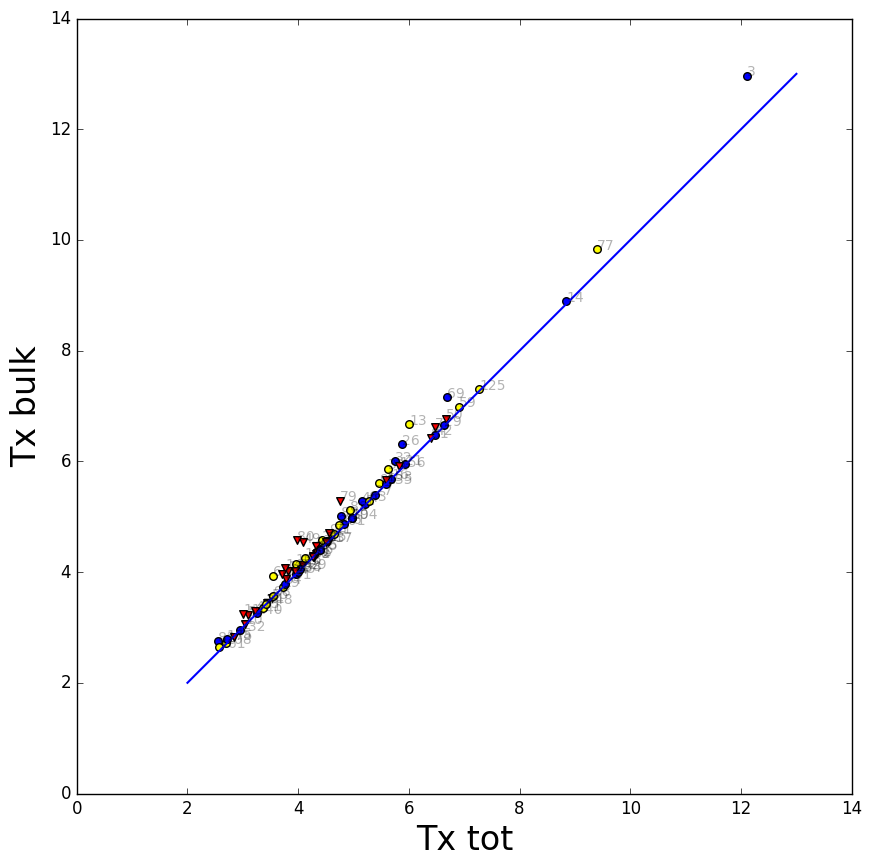

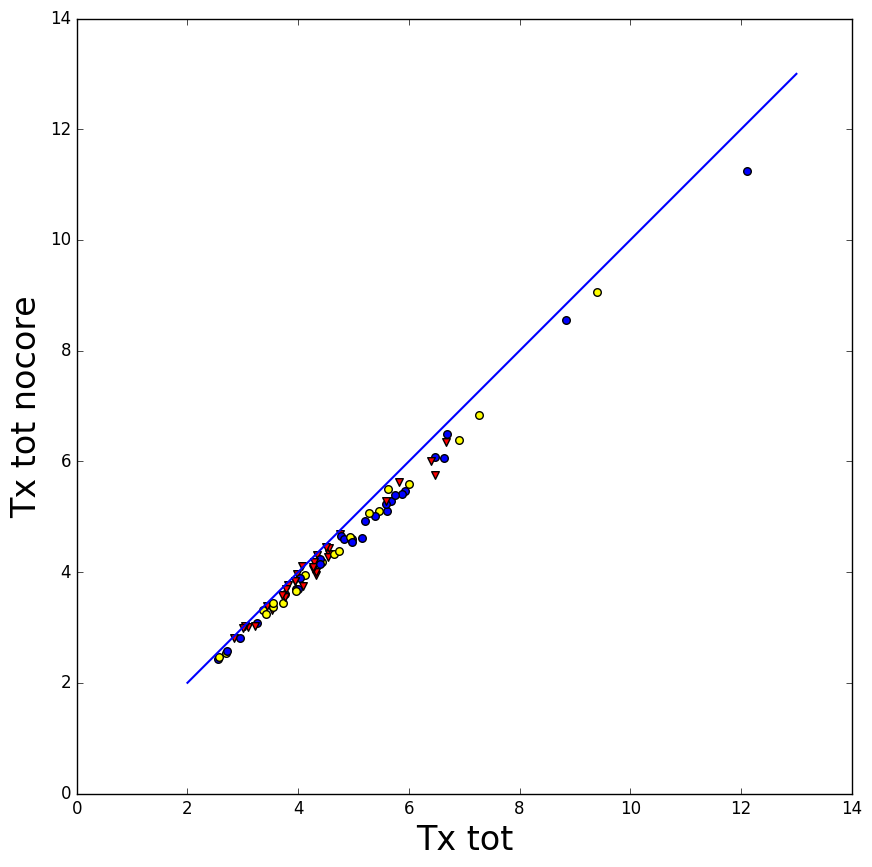

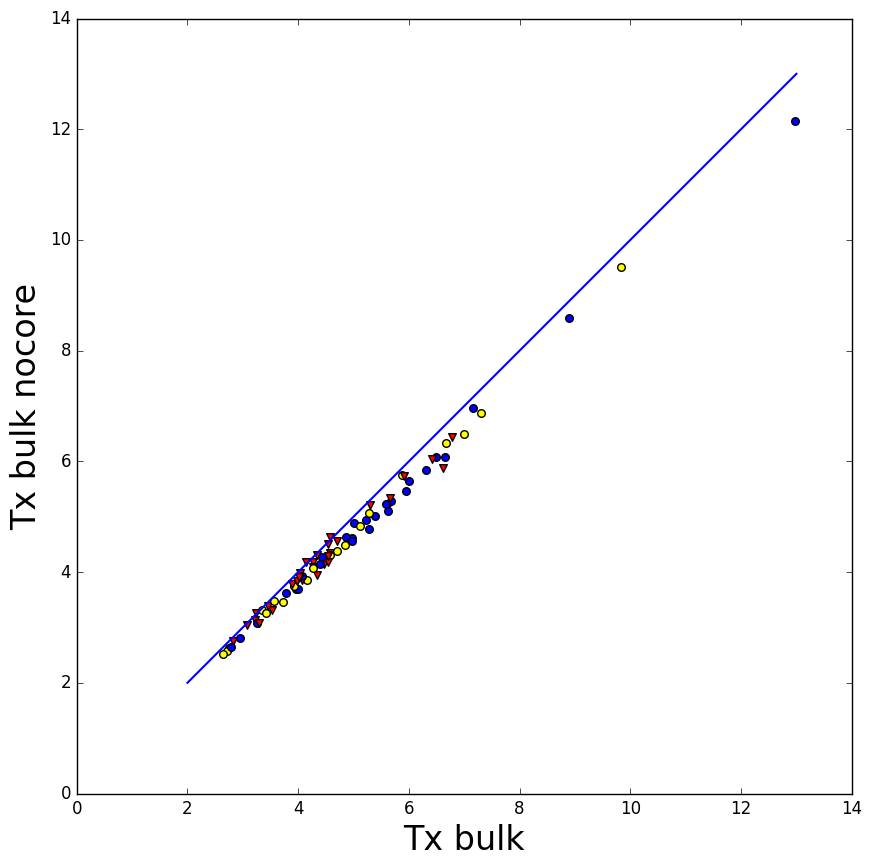

In [100]:
plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_bulk[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_bulk[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_bulk[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Tx500cEz_tot[i],Tx500cEz_bulk[i]),alpha=0.3)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx tot',fontsize=24)
plt.ylabel('Tx bulk',fontsize=24)
# plt.loglog()
plt.plot([2,13],[2,13])
plt.savefig('Tx_tot_bulk.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_tot_nocore[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_tot_nocore[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_tot[i],Tx500cEz_tot_nocore[i],c='b',s=30)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx tot',fontsize=24)
plt.ylabel('Tx tot nocore',fontsize=24)
# plt.loglog()
plt.plot([2,13],[2,13])
plt.savefig('Tx_tot_totnocore.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_bulk[i],Tx500cEz_bulk_nocore[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_bulk[i],Tx500cEz_bulk_nocore[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_bulk[i],Tx500cEz_bulk_nocore[i],c='b',s=30)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx bulk',fontsize=24)
plt.ylabel('Tx bulk nocore',fontsize=24)
# plt.loglog()
plt.plot([2,13],[2,13])
plt.savefig('Tx_bulk_bulknocore.png')
plt.show()


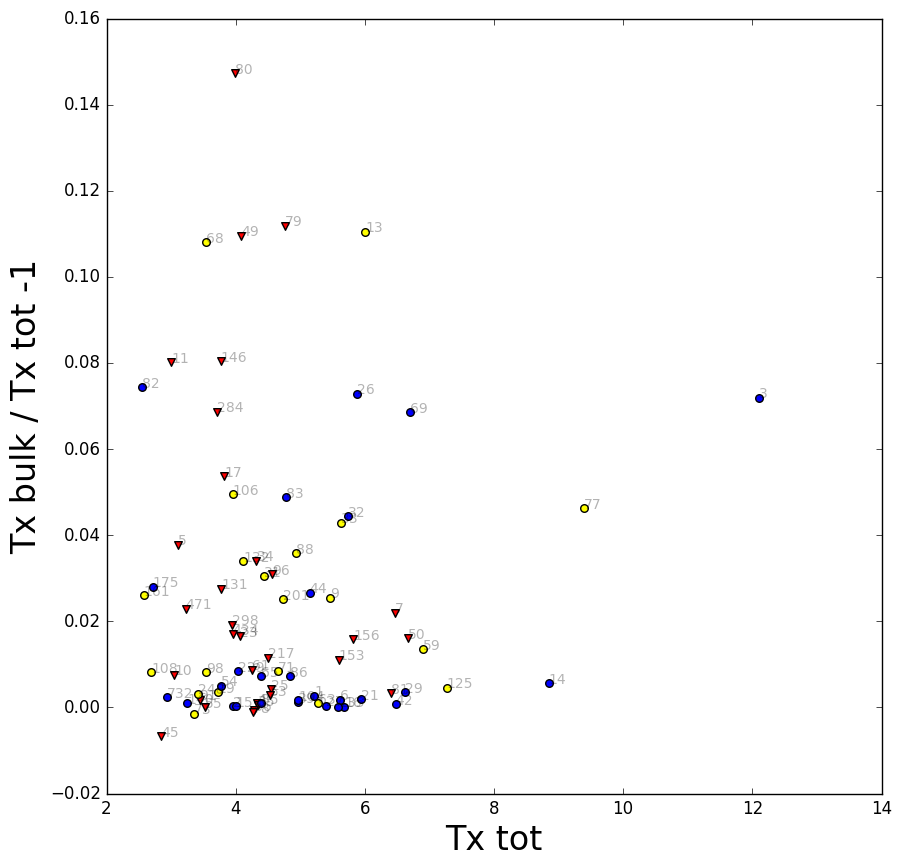

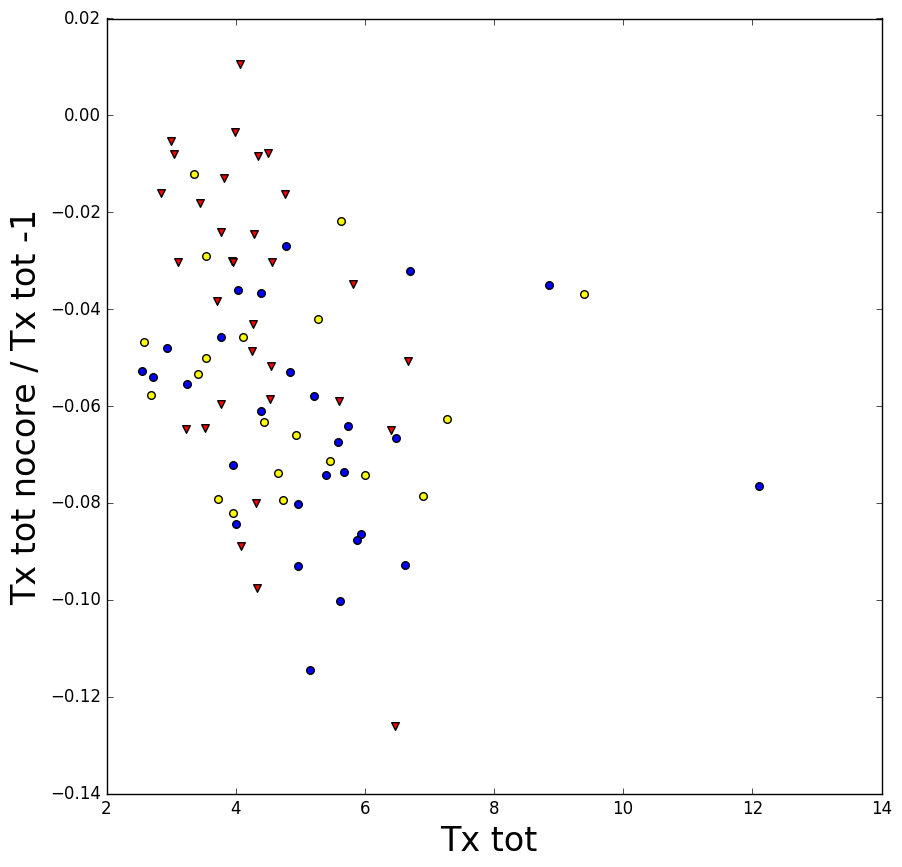

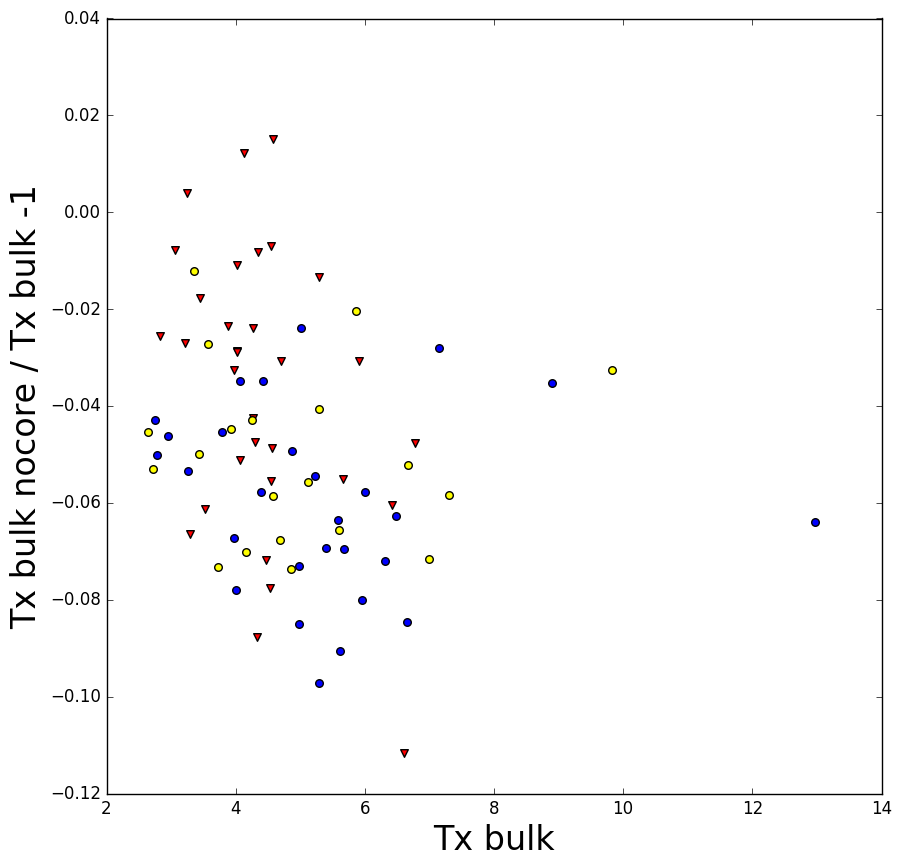

In [101]:
plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_bulk[i]-Tx500cEz_tot[i])/Tx500cEz_tot[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_bulk[i]-Tx500cEz_tot[i])/Tx500cEz_tot[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_bulk[i]-Tx500cEz_tot[i])/Tx500cEz_tot[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Tx500cEz_tot[i],(Tx500cEz_bulk[i]-Tx500cEz_tot[i])/Tx500cEz_tot[i]),alpha=0.3)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx tot',fontsize=24)
plt.ylabel('Tx bulk / Tx tot -1',fontsize=24)
# plt.loglog()
# plt.plot([2,13],[2,13])
plt.savefig('Tx_tot_bulk_frac.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_tot_nocore[i]-Tx500cEz_tot[i])/Tx500cEz_tot_nocore[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_tot_nocore[i]-Tx500cEz_tot[i])/Tx500cEz_tot_nocore[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_tot[i],(Tx500cEz_tot_nocore[i]-Tx500cEz_tot[i])/Tx500cEz_tot_nocore[i],c='b',s=30)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx tot ',fontsize=24)
plt.ylabel('Tx tot nocore / Tx tot -1',fontsize=24)
# plt.loglog()
# plt.plot([2,13],[2,13])
plt.savefig('Tx_tot_totnocore_frac.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Tx500cEz_bulk[i],(Tx500cEz_bulk_nocore[i]-Tx500cEz_bulk[i])/Tx500cEz_bulk[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Tx500cEz_bulk[i],(Tx500cEz_bulk_nocore[i]-Tx500cEz_bulk[i])/Tx500cEz_bulk[i],c='yellow',s=30)
    else:
        plt.scatter(Tx500cEz_bulk[i],(Tx500cEz_bulk_nocore[i]-Tx500cEz_bulk[i])/Tx500cEz_bulk[i],c='b',s=30)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Tx bulk',fontsize=24)
plt.ylabel('Tx bulk nocore / Tx bulk -1',fontsize=24)
# plt.loglog()
# plt.plot([2,13],[2,13])
plt.savefig('Tx_bulk_bulknocore_frac.png')
plt.show()



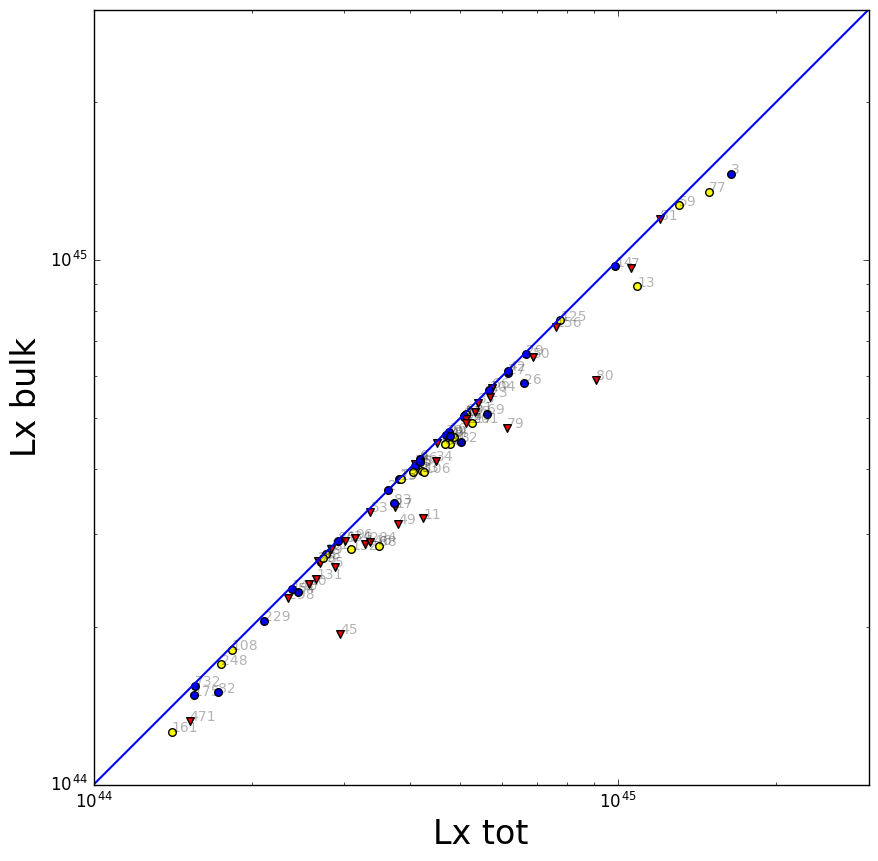

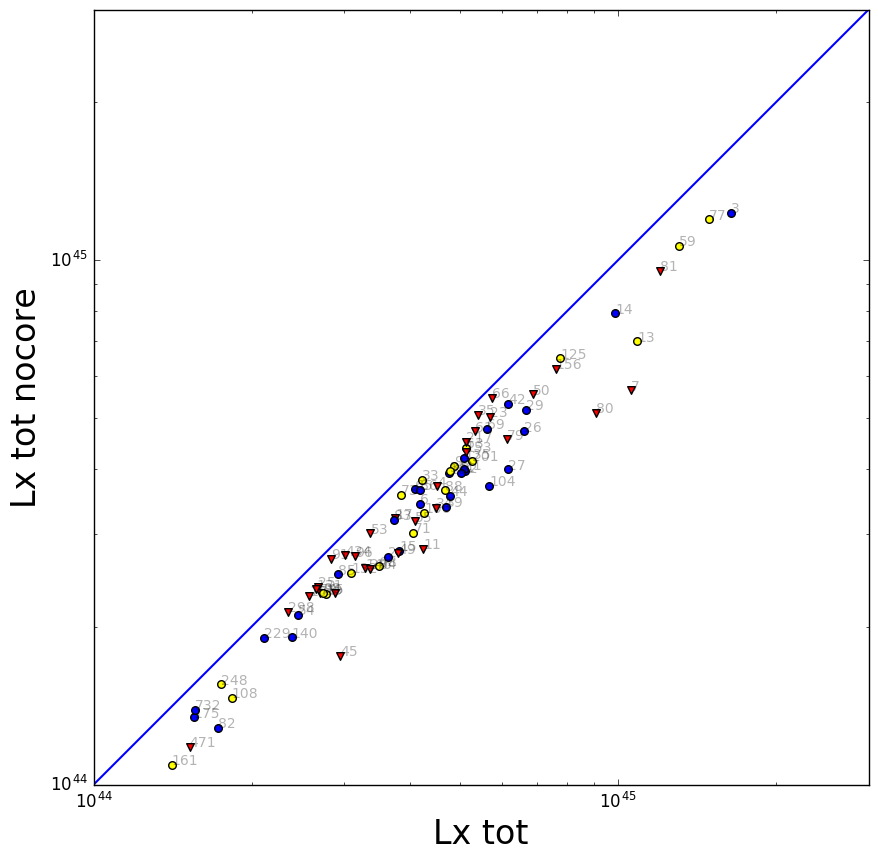

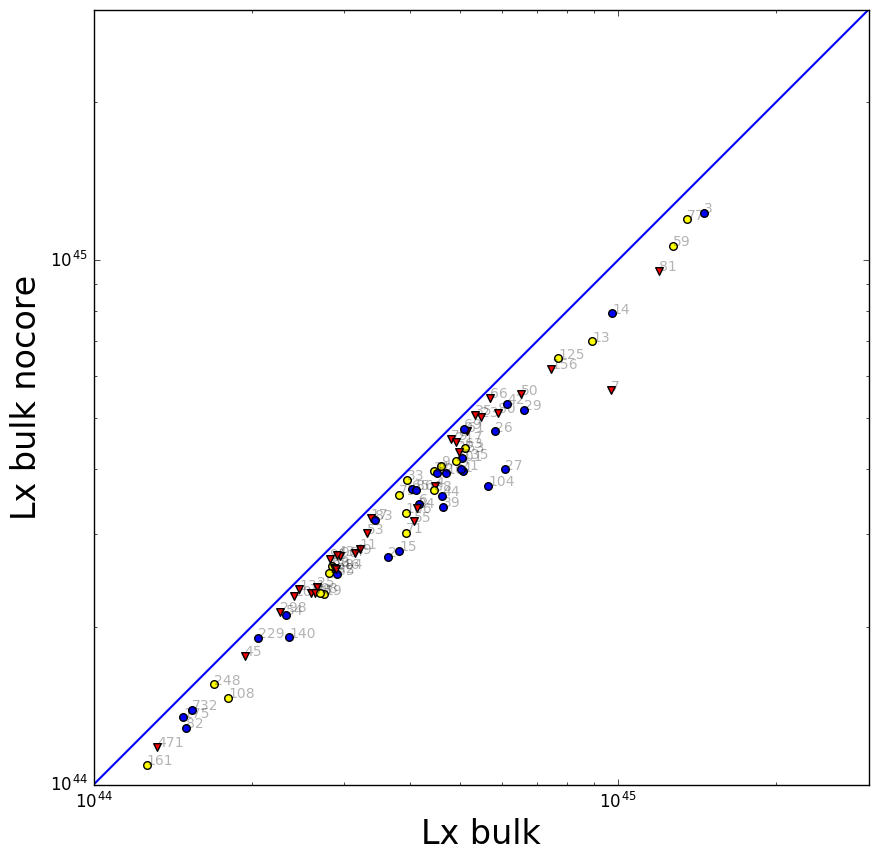

In [102]:
plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_bulk[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_bulk[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_bulk[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_tot[i],Lx500cEz_bulk[i]),alpha=0.3)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Lx tot',fontsize=24)
plt.ylabel('Lx bulk',fontsize=24)
plt.xlim(1e44,3e45)
plt.ylim(1e44,3e45)
plt.loglog()
plt.plot([1e44,3e45],[1e44,3e45])
plt.savefig('Lx_tot_bulk.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_tot_nocore[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_tot_nocore[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_tot[i],Lx500cEz_tot_nocore[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_tot[i],Lx500cEz_tot_nocore[i]),alpha=0.3)
plt.xlabel('Lx tot',fontsize=24)
plt.ylabel('Lx tot nocore',fontsize=24)
plt.xlim(1e44,3e45)
plt.ylim(1e44,3e45)
plt.plot([1e44,3e45],[1e44,3e45])
plt.loglog()
plt.savefig('Lx_tot_totnocore.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_bulk[i],Lx500cEz_bulk_nocore[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_bulk[i],Lx500cEz_bulk_nocore[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_bulk[i],Lx500cEz_bulk_nocore[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_bulk[i],Lx500cEz_bulk_nocore[i]),alpha=0.3)
    plt.xlabel('Lx bulk',fontsize=24)
plt.ylabel('Lx bulk nocore',fontsize=24)
plt.xlim(1e44,3e45)
plt.ylim(1e44,3e45)
plt.plot([1e44,3e45],[1e44,3e45])
plt.loglog()
plt.savefig('Lx_bulk_bulknocore.png')
plt.show()



In [103]:
print (Lx500cEz_bulk[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i]

-0.0121794871795


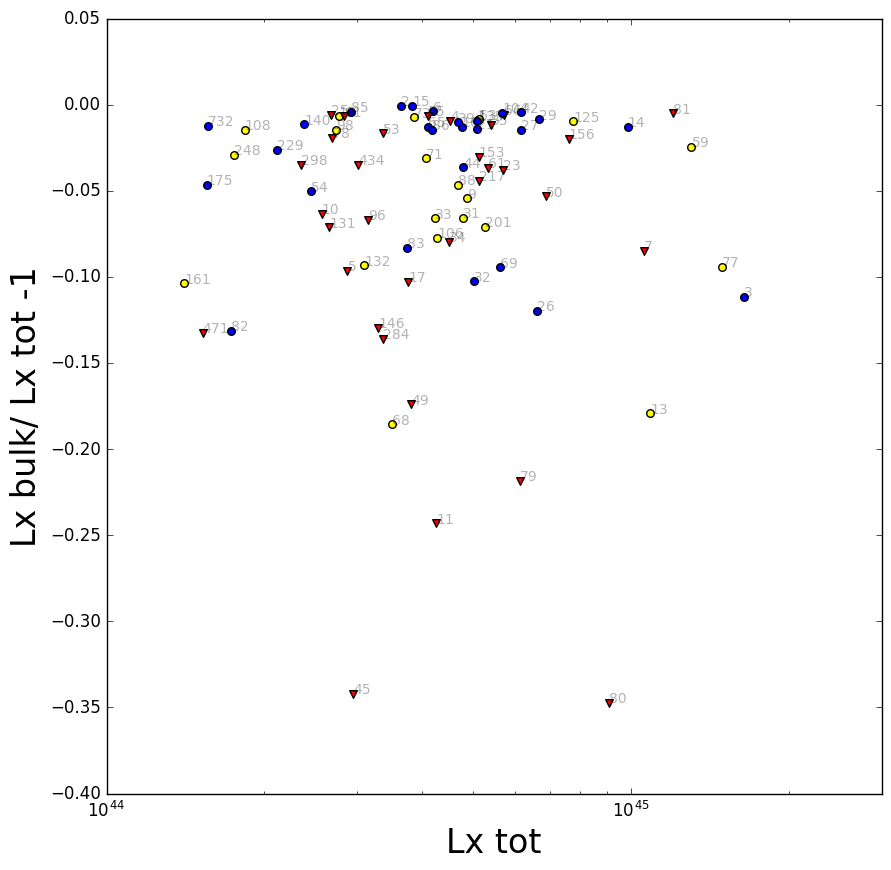

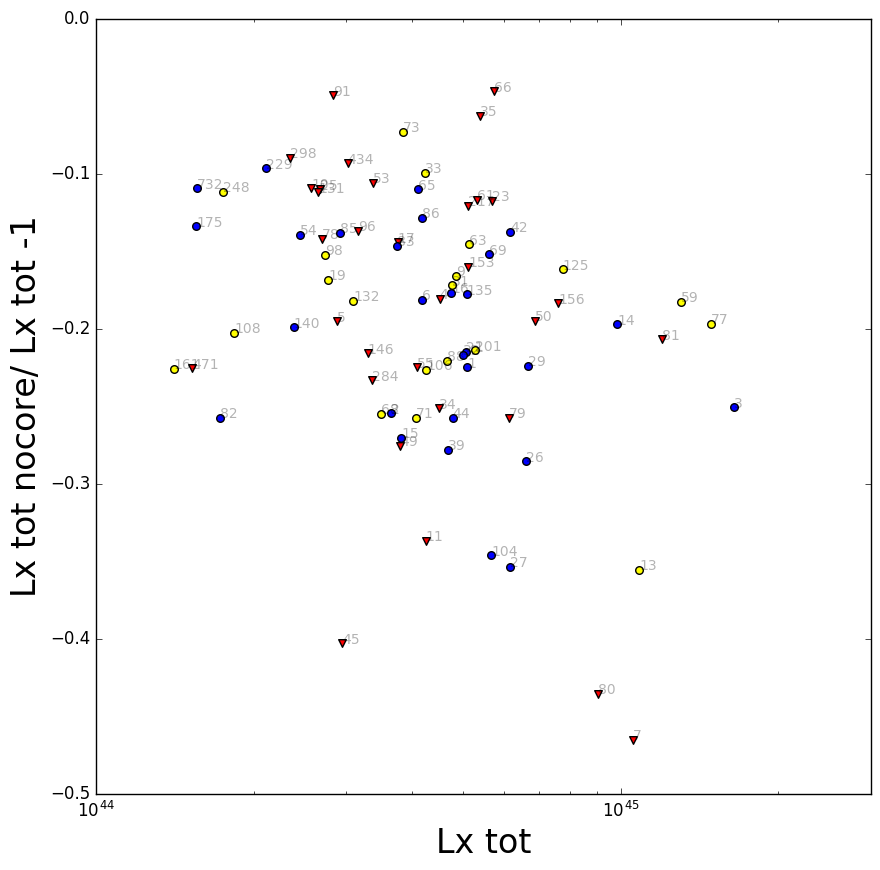

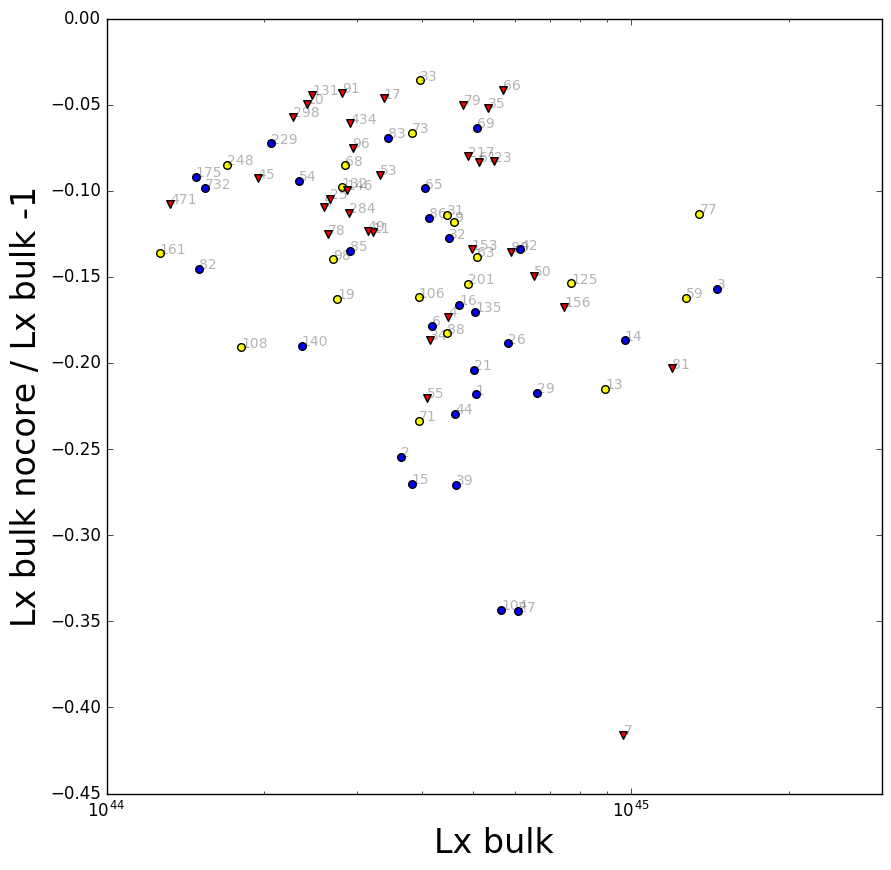

In [104]:
plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_bulk[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_bulk[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_bulk[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_tot[i],(Lx500cEz_bulk[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i]),alpha=0.3)
# plt.scatter(Lx500cEz_tot,Lx500cEz_tot_nocore)
plt.xlabel('Lx tot',fontsize=24)
plt.ylabel('Lx bulk/ Lx tot -1',fontsize=24)
plt.xlim(1e44,3e45)
# plt.ylim(1e44,3e45)
plt.semilogx()
# plt.plot([1e44,3e45],[1e44,3e45])
plt.savefig('Lx_tot_bulk_frac.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_tot_nocore[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_tot_nocore[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_tot[i],(Lx500cEz_tot_nocore[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_tot[i],(Lx500cEz_tot_nocore[i]-Lx500cEz_tot[i])/Lx500cEz_tot[i]),alpha=0.3)
plt.xlabel('Lx tot',fontsize=24)
plt.ylabel('Lx tot nocore/ Lx tot -1',fontsize=24)
plt.xlim(1e44,3e45)
# plt.ylim(1e44,3e45)
# plt.plot([1e44,3e45],[1e44,3e45])
plt.semilogx()
plt.savefig('Lx_tot_totnocore_frac.png')
plt.show()

plt.figure(figsize=(10,10))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Lx500cEz_bulk[i],(Lx500cEz_bulk_nocore[i]-Lx500cEz_bulk[i])/Lx500cEz_bulk[i],c='red',marker='v',s=30)
    elif ids in minormajormergerid:
        plt.scatter(Lx500cEz_bulk[i],(Lx500cEz_bulk_nocore[i]-Lx500cEz_bulk[i])/Lx500cEz_bulk[i],c='yellow',s=30)
    else:
        plt.scatter(Lx500cEz_bulk[i],(Lx500cEz_bulk_nocore[i]-Lx500cEz_bulk[i])/Lx500cEz_bulk[i],c='b',s=30)
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Lx500cEz_bulk[i],(Lx500cEz_bulk_nocore[i]-Lx500cEz_bulk[i])/Lx500cEz_bulk[i]),alpha=0.3)
    plt.xlabel('Lx bulk',fontsize=24)
plt.ylabel('Lx bulk nocore / Lx bulk -1',fontsize=24)
plt.xlim(1e44,3e45)
# plt.ylim(1e44,3e45)
# plt.plot([1e44,3e45],[1e44,3e45])
plt.semilogx()
plt.savefig('Lx_bulk_bulknocore_frac.png')
plt.show()




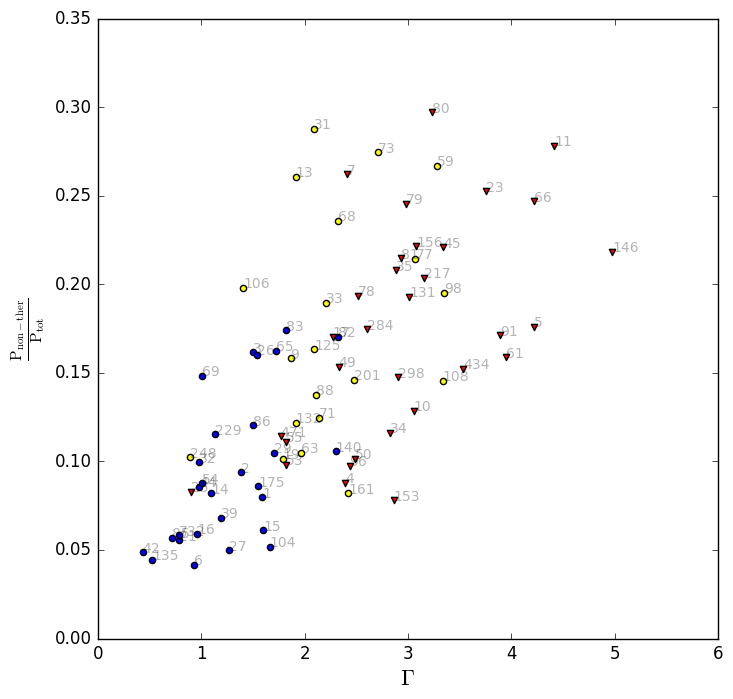

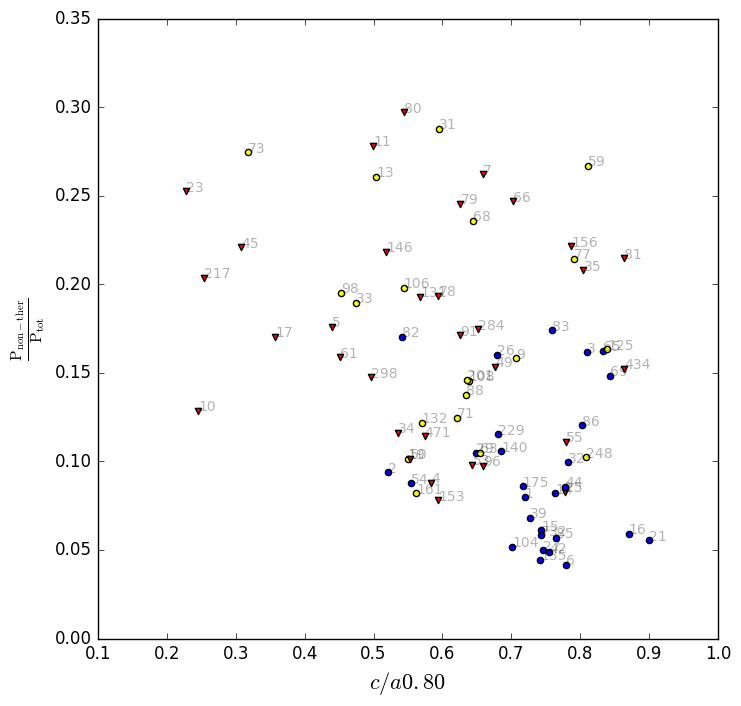

In [105]:
plt.figure(figsize=(8,8))
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\rm \frac{P_{non-ther}}{P_{tot}}$')
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(Gamma_new[i],fnt[i],c='red',marker='v')
    elif ids in minormajormergerid:
        plt.scatter(Gamma_new[i],fnt[i],c='yellow')
    else:
        plt.scatter(Gamma_new[i],fnt[i],c='b')
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (Gamma_new[i],fnt[i]),alpha=0.3)
plt.show()


plt.figure(figsize=(8,8))
plt.xlabel(r'$c/a %.2f$'%(rlist[ir]))
plt.ylabel(r'$\rm \frac{P_{non-ther}}{P_{tot}}$')
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids in majormergerid:
        plt.scatter(ell_r500c_new[i],fnt[i],c='red',marker='v')
    elif ids in minormajormergerid:
        plt.scatter(ell_r500c_new[i],fnt[i],c='yellow')
    else:
        plt.scatter(ell_r500c_new[i],fnt[i],c='b')
    txt=str(int(z0idnew[i])) 
    plt.annotate(txt, (ell_r500c_new[i],fnt[i]),alpha=0.3)
plt.show()

In [13]:
Massdef='M_{tot,500c}'
MtotDict={'M_{HSE,500c}':Mhse500c,'M_{gas,500c}':Mgas500c,'M_{tot,500c}':Mtot500c_new}
M=MtotDict[Massdef]
# print Mtot

obsstr='Tx_{tot,nocore}';
obsDict={'Tx_{tot}':Tx500cEz_tot,'Tx_{tot,nocore}':Tx500cEz_tot_nocore,\
         'Tx_{bulk}':Tx500cEz_bulk,'Tx_{bulk,nocore}':Tx500cEz_bulk_nocore,\
         'Lx_{tot}':Lx500cEz_tot,'Lx_{tot,nocore}':Lx500cEz_tot_nocore,\
        'Lx_{bulk}':Lx500cEz_bulk,'Lx_{bulk,nocore}':Lx500cEz_bulk_nocore};

obsUnitDict={'Tx_{tot}':'keV','Tx_{tot,nocore}':'keV','Tx_{bulk,nocore}':'keV',\
             'Tx_{bulk}':'keV','Lx_{tot}':'erg/s','Lx_{bulk}':'erg/s',\
             'Lx_{bulk,nocore}':'erg/s'};

obs=obsDict[obsstr]
unitstr=obsUnitDict[obsstr]


In [14]:
# plt.figure(figsize=(10,10))
# plt.scatter(Lx500cEz_tot, Lx500cEz_tot_nocore,s=4)
# plt.loglog()
# plt.xlabel('Lx tot with core')
# plt.ylabel('Lx tot no core')
# plt.xlim(1e44,2e45); plt.ylim(1e44,2e45)
# plt.plot([1e44,2e45],[1e44,2e45])
# # plt.xlim(2,12); plt.ylim(2,12)
# # plt.plot([2,12],[2,12])
# for i in range(len(z0idnew)):
#     if z0idnew[i] in [17,23,31,35,59,61,66,73,81,83,]:
#         plt.scatter(Lx500cEz_tot[i], Lx500cEz_tot_nocore[i],c='r',s=20)
#     txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (Lx500cEz_tot[i],Lx500cEz_tot_nocore[i]),alpha=0.3)
# plt.savefig('Lx_wocore.png')
# plt.show()

In [15]:
# plt.scatter(Mhse500c,Mtot500c_new)
# plt.xlabel('HSE')
# plt.ylabel('tot')
# plt.loglog()
# plt.plot([1e14,2e15],[1e14,2e15])
# for i in range(len(z0idnew)):
#     if z0idnew[i] in majormergerid:
#         plt.scatter(Mhse500c[i], Mtot500c_new[i],c='r',s=20)
#     txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (Mhse500c[i],Mtot500c_new[i]),alpha=0.3)
# plt.show()

In [16]:
print sum(z0idnew==allz0id[filter_whole])

80


## Plot scaling relation

$$M_{gas}\propto M$$
$$T\propto \Delta^{1/3}M^{2/3}$$
$$L_{bol}\propto \Delta^{7/6}M^{4/3}$$
$$L_{T>2keV}\propto \Delta M$$
$$Y\propto \Delta^{1/3} M^{5/3}$$
### fix slope or not?



In [17]:
from matplotlib.ticker import FormatStrFormatter
def change_tick(ax,fontsize=18):
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
        

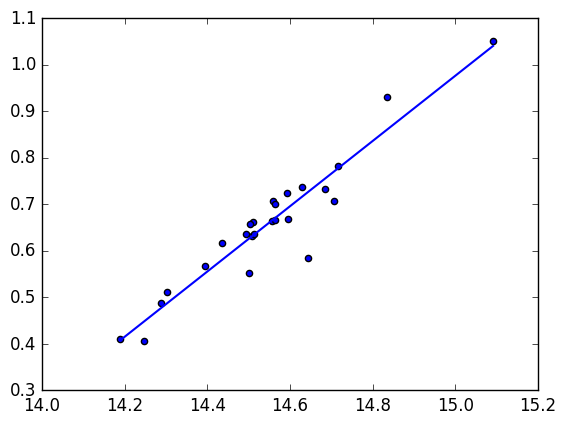

slope= 0.701748558953
intercept= -9.54931281831
correlation r_value= 0.95027770146
p_value= 3.82919026486e-13
Standard error of the estimated gradient= 0.0479502525573
standard deviation from best-fit= 0.0445674821321
0.696216142412
25


In [97]:
M_cutell=[]
G_cutell=[]
obs_cutell=[]

for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if (inner_ell_new[i])>0.6:
#         if (outer_ell_new[i]>0.6):
        if ell_r500c_new[i]>0.6:
            M_cutell.append(M[i])
            G_cutell.append(Gamma_new[i])
            obs_cutell.append(obs[i])

slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.log10(M_cutell),np.log10(obs_cutell))
M_cutell=np.array(M_cutell)
plt.scatter(np.log10(M_cutell),np.log10(obs_cutell))
  
tm=np.array([M_cutell.min(),M_cutell.max()])
pltline = slope*np.log10(tm)+intercept
plt.plot(np.log10(tm),pltline)
plt.show()  
print 'slope=',slope
print 'intercept=',intercept
print 'correlation r_value=',r_value
print 'p_value=',p_value
print 'Standard error of the estimated gradient=',std_err
line = slope*np.log10(M_cutell)+intercept
print 'standard deviation from best-fit=', (np.sum(((np.log10(obs_cutell)-line))**2)/(len(obs_cutell)-2))**0.5
print slope*14.6+intercept
print len(obs_cutell)

In [62]:
print allelldata[:,1][majormergerid]

IndexError: index 91 is out of bounds for axis 1 with size 85

In [48]:
print majormergerid
print selectid

[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]
[1.0, 2.0, 3.0, 132.0, 6.0, 135.0, 8.0, 9.0, 140.0, 13.0, 14.0, 15.0, 16.0, 19.0, 21.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 39.0, 42.0, 44.0, 175.0, 54.0, 73.0, 59.0, 63.0, 65.0, 68.0, 69.0, 71.0, 200.0, 201.0, 77.0, 82.0, 83.0, 85.0, 86.0, 88.0, 732.0, 223.0, 98.0, 100.0, 229.0, 104.0, 161.0, 106.0, 108.0, 248.0, 125.0, 149.0]


slope= 0.63842814127
intercept= -8.66014582993
correlation r_value= 0.854024253618
p_value= 7.66455441119e-24
Standard error of the estimated gradient= 0.0440344497695
scatter from best-fit= 0.0658618259716


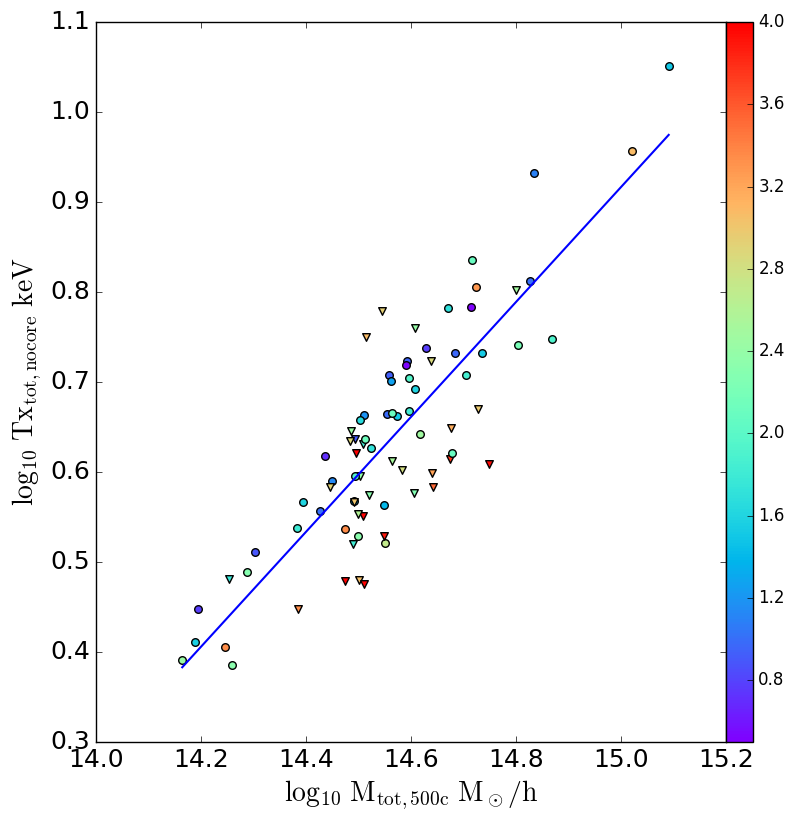

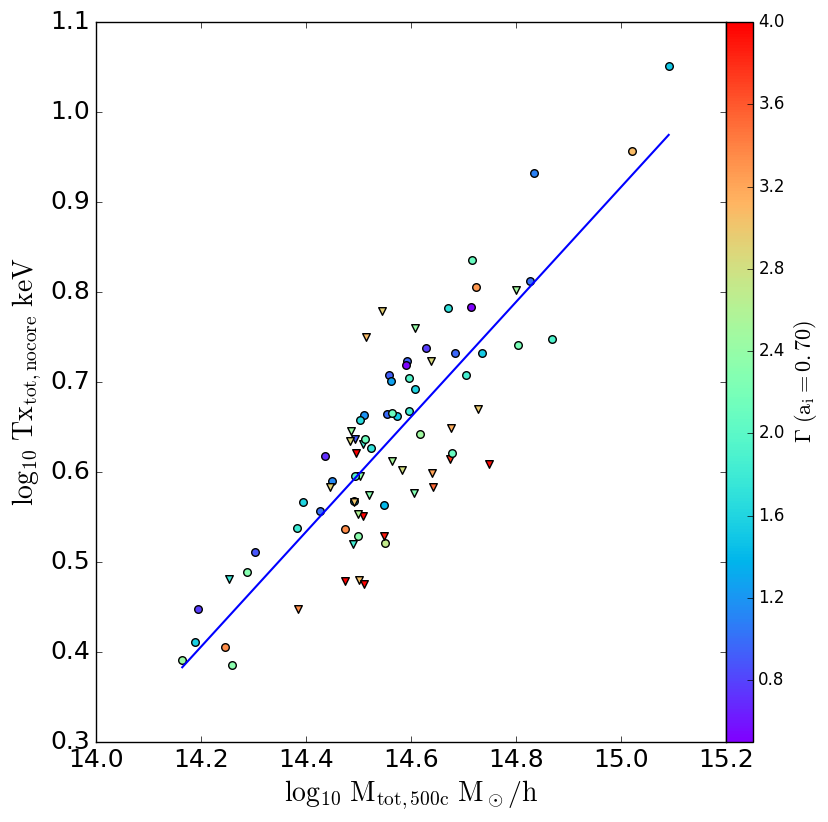

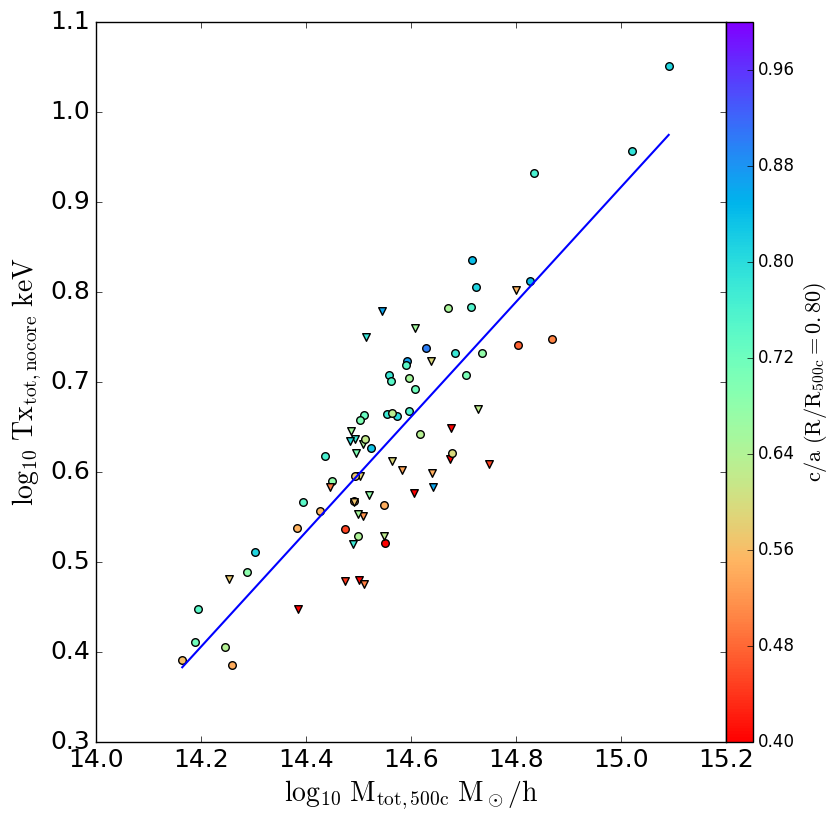

80
SpearmanrResult(correlation=-0.52283169245194561, pvalue=6.5213691747021081e-07)


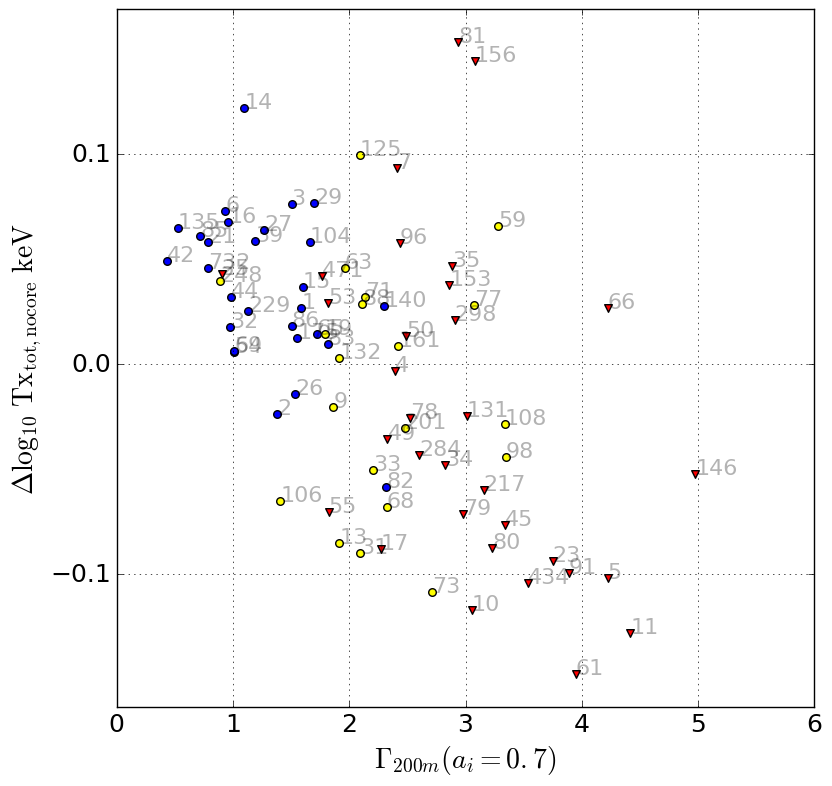

80


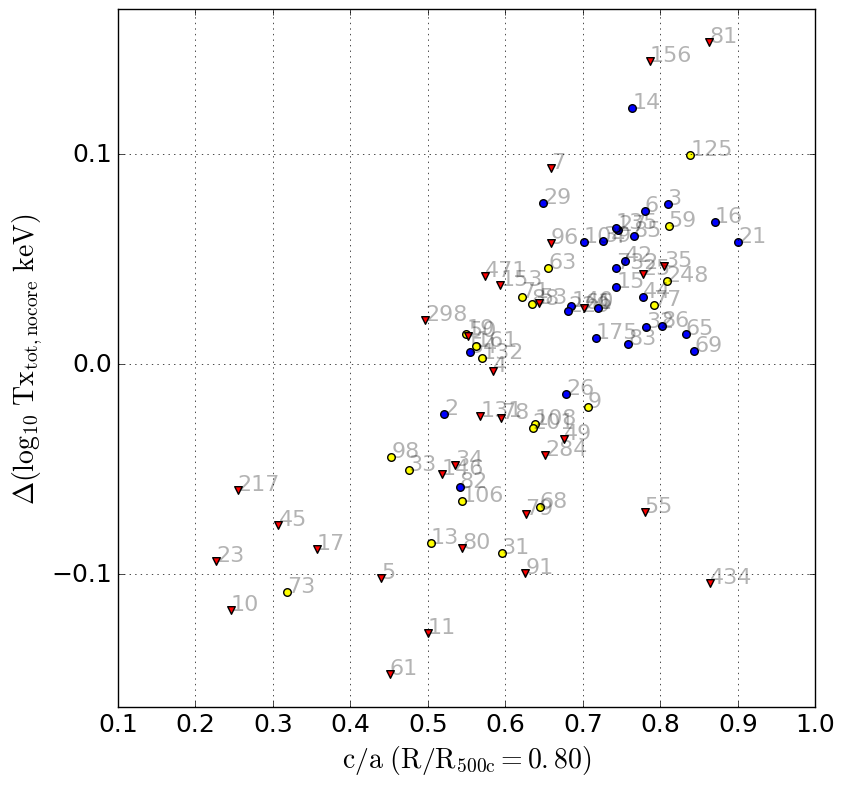

In [21]:
M=np.array(M)
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.log10(M),np.log10(obs))
print 'slope=',slope
print 'intercept=',intercept
print 'correlation r_value=',r_value
print 'p_value=',p_value
print 'Standard error of the estimated gradient=',std_err
line = slope*np.log10(M)+intercept
print 'scatter from best-fit=', (np.sum(((np.log10(obs)-line))**2)/(len(obs)-2))**0.5



fig=plt.figure(figsize=(9,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
# ax.plot(np.log10(M), line)
tm=np.array([M.min(),M.max()])
pltline = slope*np.log10(tm)+intercept
ax.plot(np.log10(tm), pltline)

change_tick(ax)
# ax.plot(np.log10(Mtot[filter_relax]), line_exmajor,'.')


cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapgamma.to_rgba(Gamma_new[i])
    if ids in majormergerid:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=30)
    else:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=30)
    txt=str(int(z0idnew[i])) 
#     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)
# plt.xlim(14.0,15.2)
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)

plt.ylabel(r'$\rm log_{10} \ %s  \ %s $'%(obsstr,unitstr),fontsize=20)

colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel(r'$\rm \Gamma \ (a_i= %.2f)$'%(np.around(a,decimals=2)))
# plt.savefig('figures/scaling_'+Massdef+'_'+obsstr+'_color_gamma.eps')
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_gamma.png')
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_gamma.eps')

plt.show()




fig=plt.figure(figsize=(9,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
# ax.plot(np.log10(M), line)
ax.plot(np.log10(tm), pltline)
change_tick(ax)

cnormell=colors.Normalize(vmin=0.4,vmax=1)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

# xlabels=dict(zip([Massdef,obstr],['M_{HSE,500c}',]))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapell.to_rgba(ell_r500c_new[i])
    if ids in majormergerid:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=30)
    else:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=30)
    txt=str(int(z0idnew[i])) 
#     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)

# plt.xlabel(r'$\rm log10 \ %s \ Msun/h$'%(Massdef))
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)
plt.ylabel(r'$\rm log_{10} \ %s \ %s$'%(obsstr,unitstr),fontsize=20)

colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]))
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.png')
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.eps')
plt.show()


plt.figure(figsize=(9,9))


ax=plt.gca()
change_tick(ax)
plt.yticks(np.arange(-0.2,0.2,0.1))


# plt.xlabel(r"$\Gamma{0}(a={1}\sim 1)$".format(Gammadef,np.around(a,decimals=2)))
plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
plt.ylabel(r'$\rm \Delta log_{10} \ %s \ %s $'%(obsstr,unitstr),fontsize=20)

print len(z0idnew)
spx=[]
spy=[]
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
        else:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=30)
    else:
        plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=30)
    txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3)
#     if z0idnew[i]==82:
    plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),\
                     alpha=0.3,fontsize=16)
    spx.append(Gamma_new[i])
    spy.append(np.log10(obs[i])-line[isubsample])
    
print spearmanr(spx,spy)
plt.grid()
# plt.savefig('Gamma_'+obsstr+'_deviation.png')
# plt.savefig('Gamma_'+obsstr+'_deviation.eps')

plt.show()


plt.figure(figsize=(9,9))
# plt.xlabel(r"$\Gamma{0}(a={1}\sim 1)$".format(Gammadef,np.around(a,decimals=2)))
plt.xlabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)
ax=plt.gca()

change_tick(ax)

plt.yticks(np.arange(-0.2,0.2,0.1))

print len(z0idnew)
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
        else:
            plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=30)
    else:
        plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=30)
    txt=str(int(z0idnew[i])) 
#     if z0idnew[i]==82:
    plt.annotate(txt, (ell_r500c_new[i],(np.log10(obs[i])-line[isubsample])),\
                     alpha=0.3,fontsize=16)
plt.grid()
# plt.savefig('coa_'+obsstr+'_deviation.png')
# plt.savefig('coa_'+obsstr+'_deviation.eps')

plt.show()


SpearmanrResult(correlation=nan, pvalue=nan)


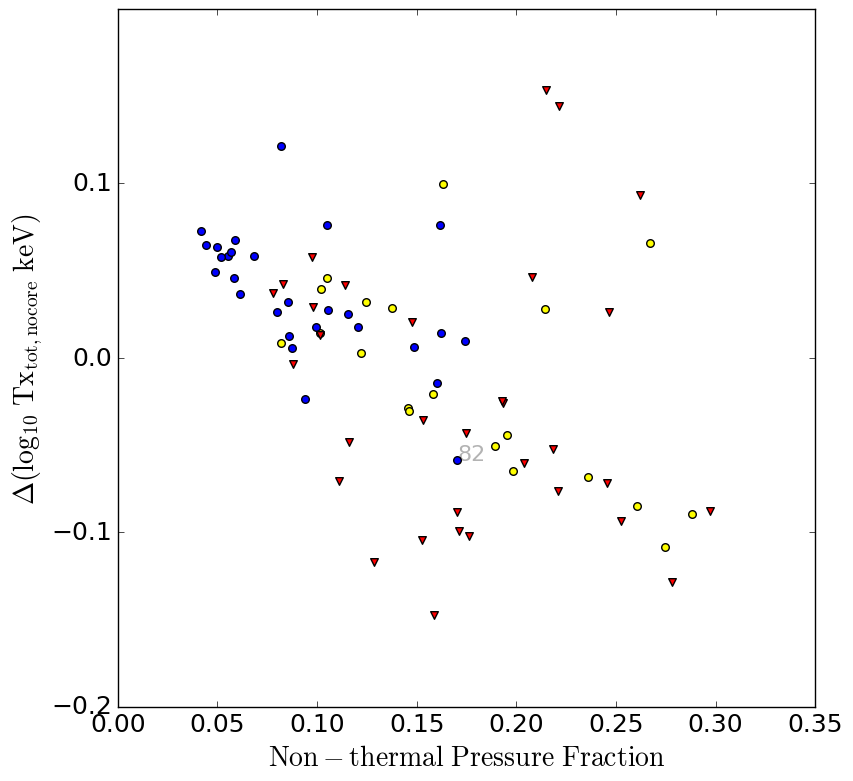

SpearmanrResult(correlation=nan, pvalue=nan)


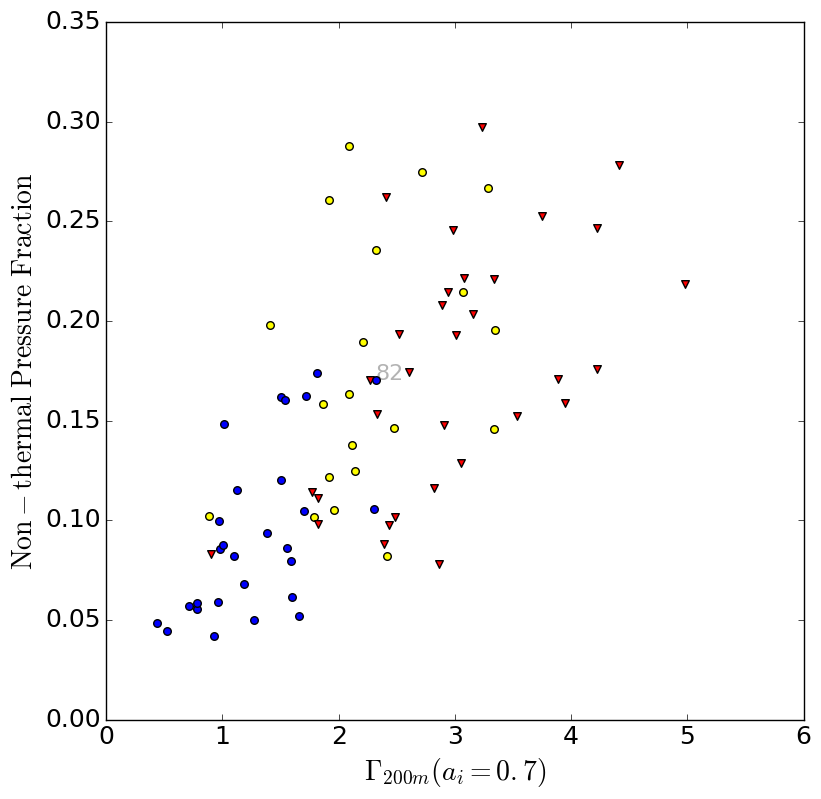

In [132]:
spx=[]
spy=[]
plt.figure(figsize=(9,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
        else:
            plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=30)
    else:
        plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='b',s=30)
        
    txt=str(int(z0idnew[i])) 
    if z0idnew[i]==82:
        plt.annotate(txt, (fnt[i],(np.log10(obs[i])-line[isubsample])),\
                     alpha=0.3,fontsize=16)
        
ax=plt.gca()

change_tick(ax)

plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r'$\rm Non-thermal \ Pressure \ Fraction$',fontsize=20)
plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('fnt_DT.eps')
print spearmanr(spx,spy)
plt.show()

plt.figure(figsize=(9,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(Gamma_new[i],fnt[i],c='r',marker='v',s=30)
        else:
            plt.scatter(Gamma_new[i],fnt[i],c='yellow',s=30)
    else:
        plt.scatter(Gamma_new[i],fnt[i],c='b',s=30)
        
    txt=str(int(z0idnew[i])) 
    if z0idnew[i]==82:
        plt.annotate(txt, (Gamma_new[i],fnt[i]),\
                     alpha=0.3,fontsize=16)
        
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
plt.ylabel(r'$\rm Non-thermal \ Pressure \ Fraction$',fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('fnt_Gamma.eps')
print spearmanr(spx,spy)
plt.show()

In [108]:
1./0.8-1

0.25

In [93]:
print minormajormergerid

[  4   5   7   9  10  11  13  17  19  23  25  31  33  34  35  45  49  50
  53  55  59  61  63  66  68  71  73  77  78  79  80  81  88  91  96  98
 106 108 118 125 131 132 138 146 153 156 161 201 217 221 248 250 284 298
 434 471]


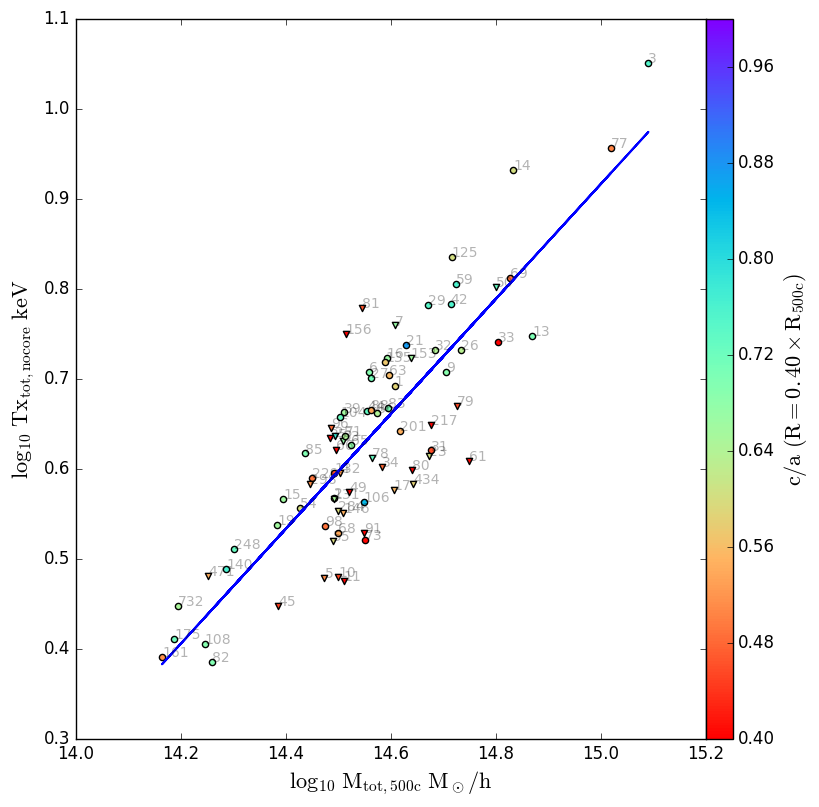

In [94]:

fig=plt.figure(figsize=(9,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
ax.plot(np.log10(M), line)

cnormell=colors.Normalize(vmin=0.4,vmax=1)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

# xlabels=dict(zip([Massdef,obstr],['M_{HSE,500c}',]))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapell.to_rgba(ell_r500c_new[i])
    if ell_r500c_new[i]>0:
        if ids in majormergerid:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v')
        else:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color)
    txt=str(int(z0idnew[i])) 
    ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)

# plt.xlabel(r'$\rm log10 \ %s \ Msun/h$'%(Massdef))
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef))

plt.ylabel(r'$\rm log_{10} \ %s \ %s$'%(obsstr,unitstr))
colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel(r'$\rm c/a \ (R=%.2f \times R_{500c})$'%(rlist[ir]))
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.png')
plt.show()



default definition is M_total_200m


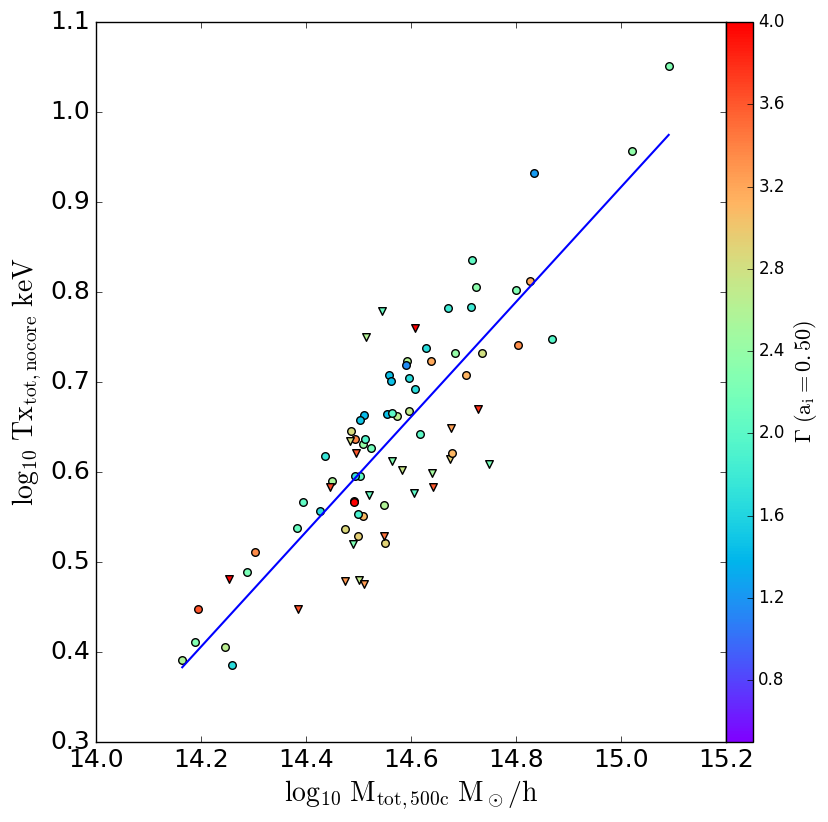

0.5 SpearmanrResult(correlation=-0.36458040318799817, pvalue=0.00088479886722390587)


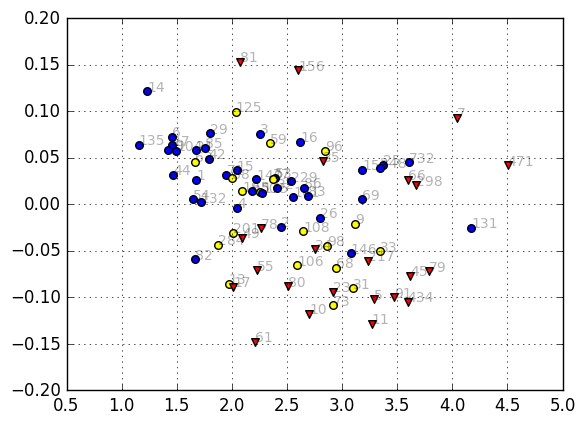

default definition is M_total_200m


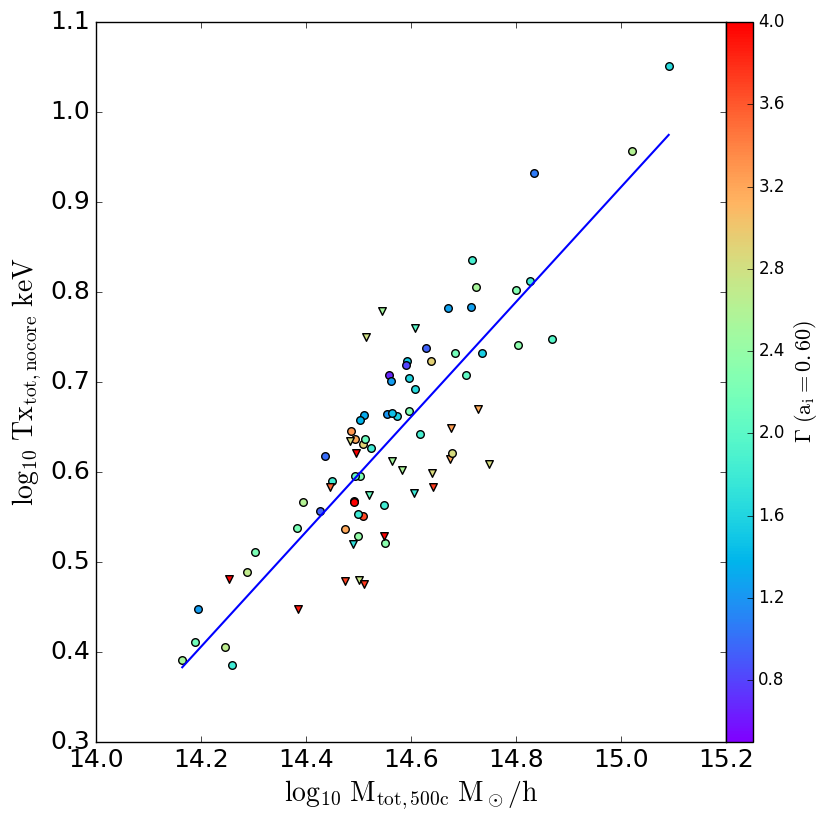

0.6 SpearmanrResult(correlation=-0.44064697609001413, pvalue=4.3022483026860516e-05)


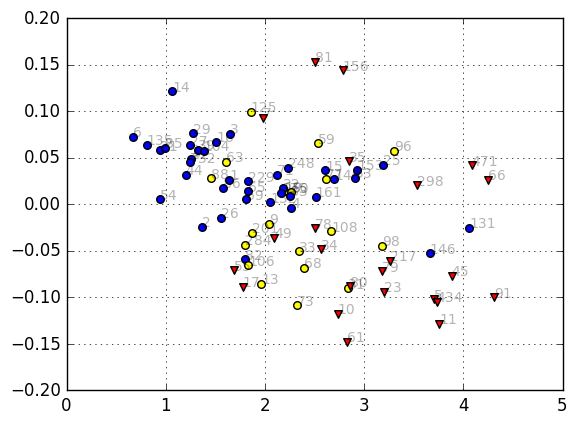

default definition is M_total_200m


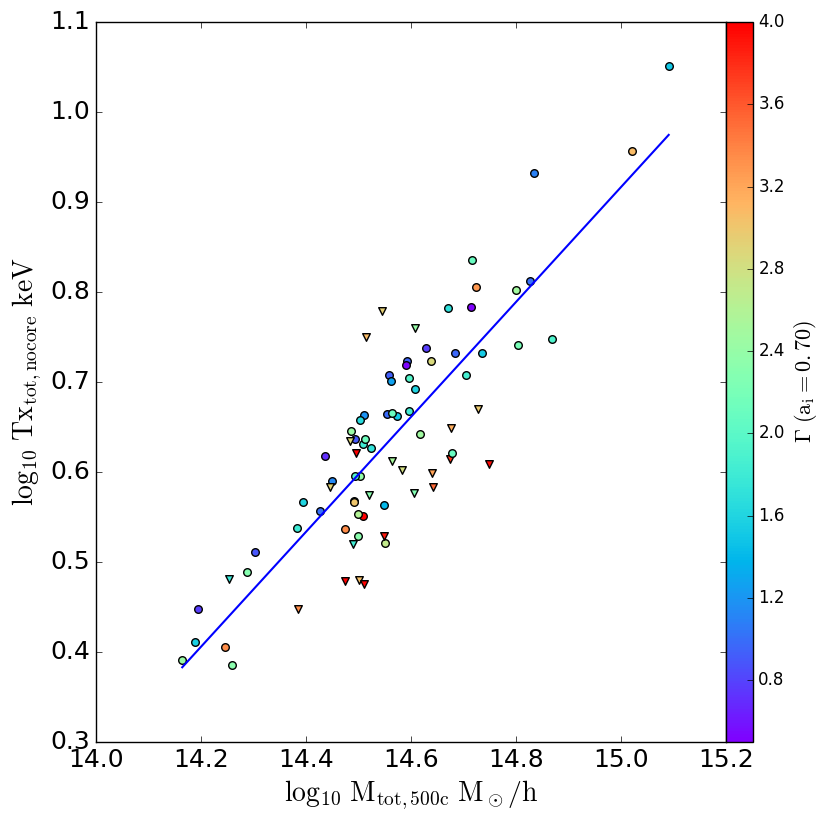

0.7 SpearmanrResult(correlation=-0.52283169245194561, pvalue=6.5213691747021081e-07)


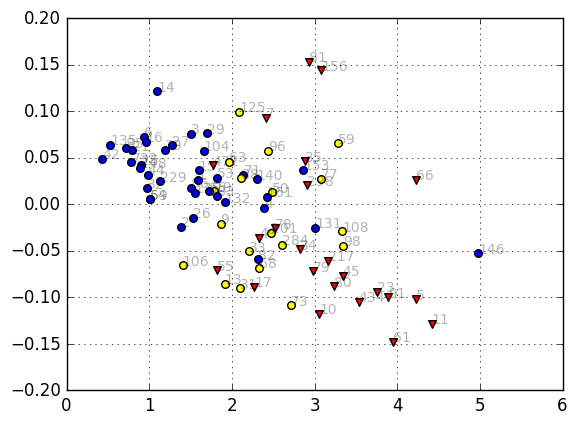

default definition is M_total_200m


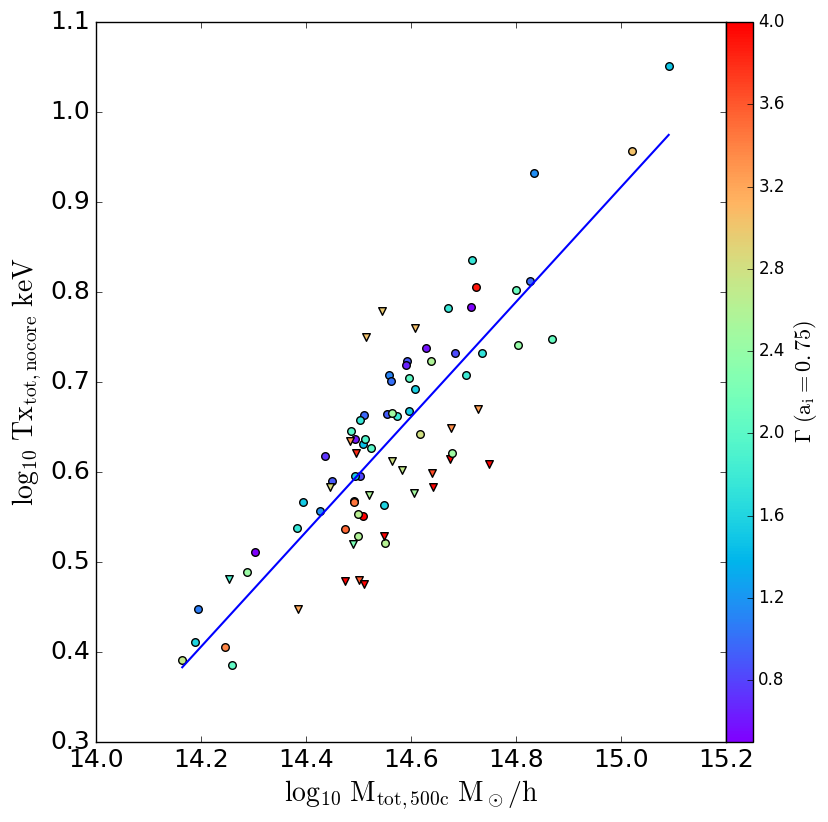

0.75 SpearmanrResult(correlation=-0.53844350679793718, pvalue=2.5815736099281138e-07)


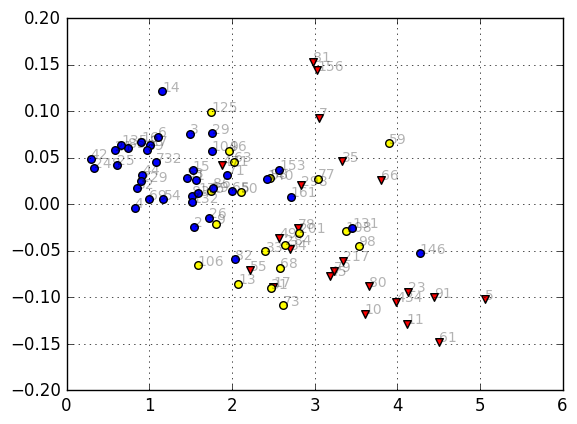

default definition is M_total_200m


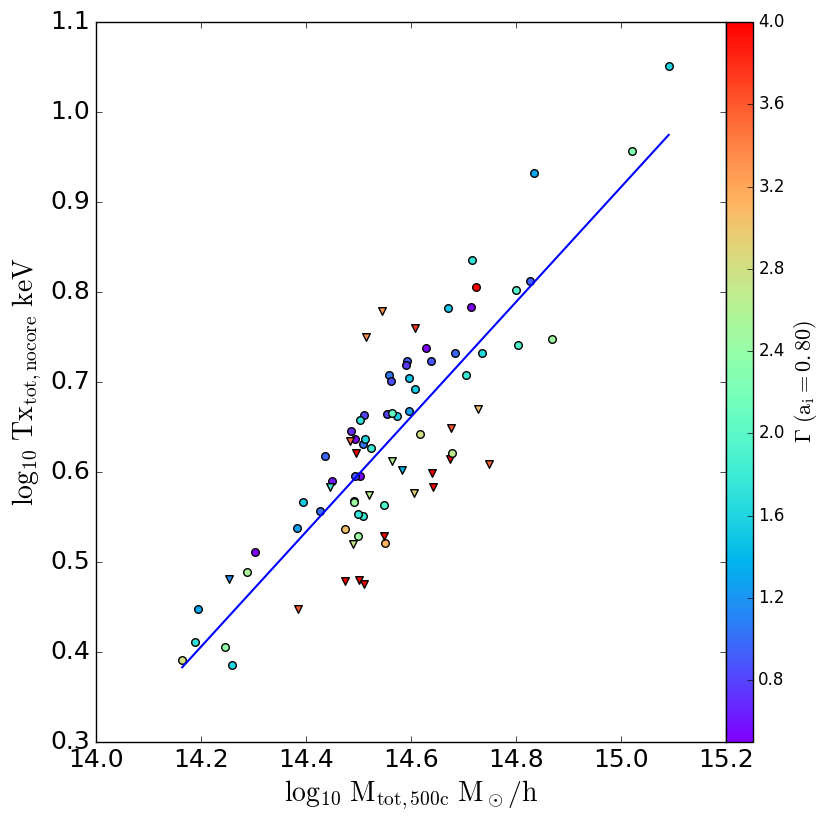

0.8 SpearmanrResult(correlation=-0.53216127519924994, pvalue=3.7693569464540187e-07)


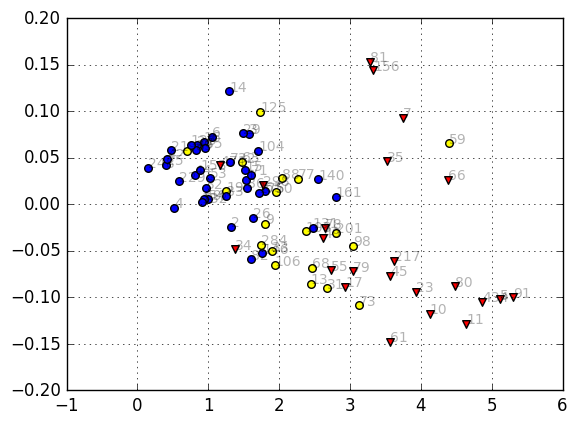

default definition is M_total_200m


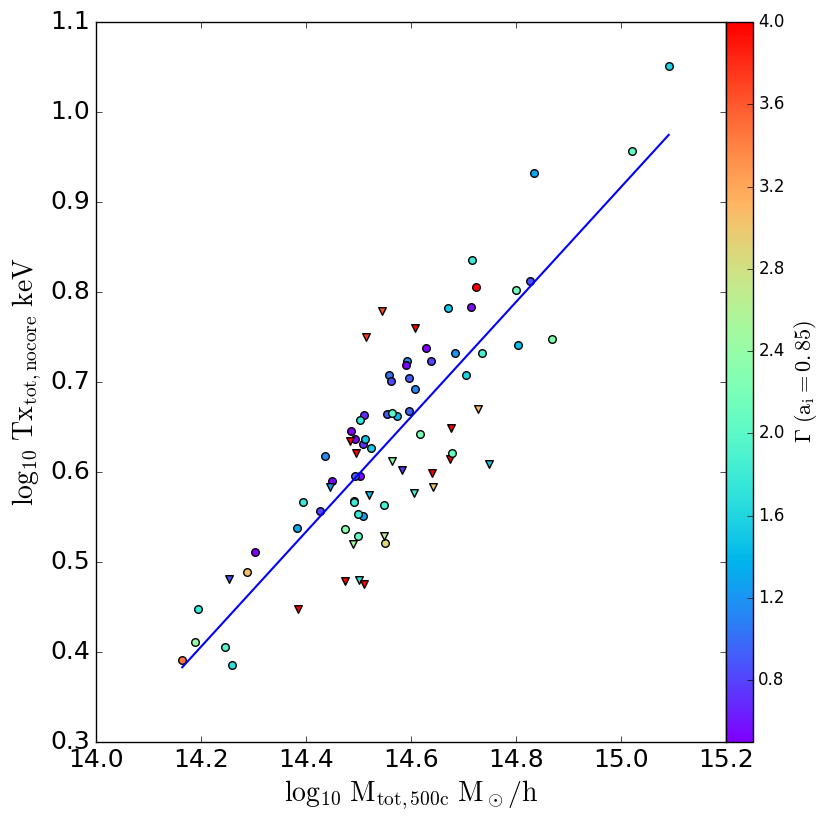

0.85 SpearmanrResult(correlation=-0.37294889826535399, pvalue=0.00065666382596836731)


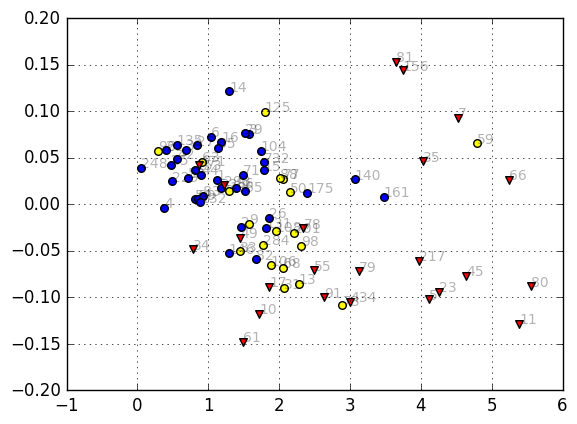

default definition is M_total_200m


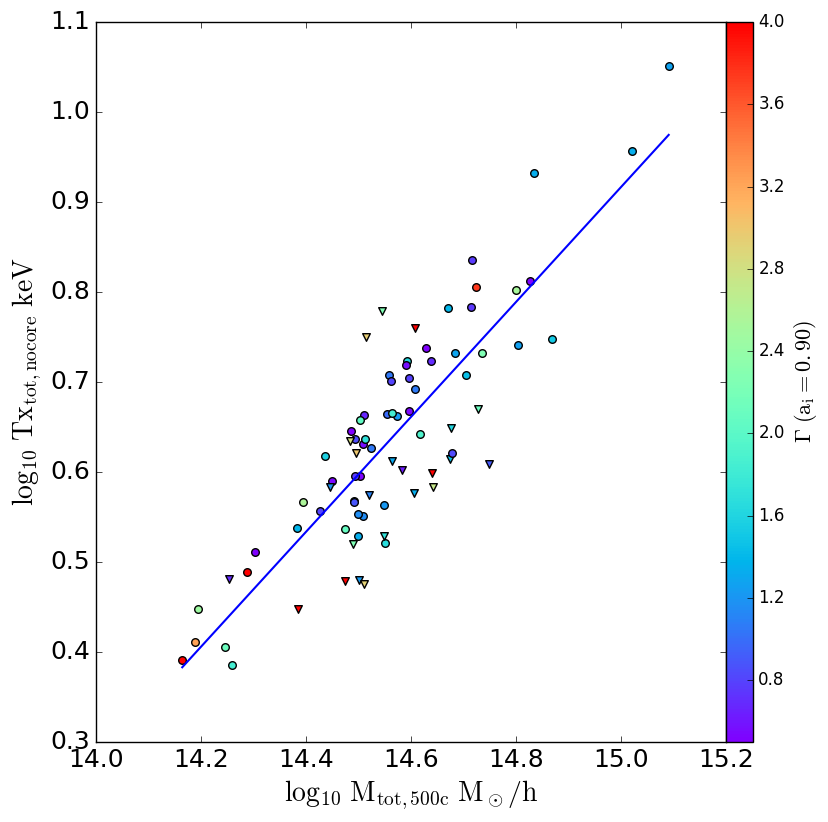

0.9 SpearmanrResult(correlation=-0.1775199249882794, pvalue=0.11517863542729714)


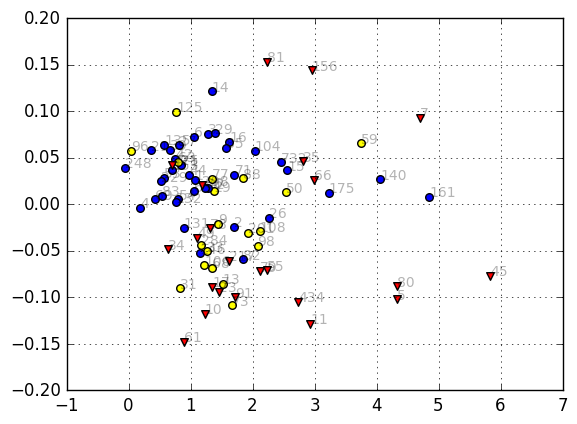

In [82]:
for a in [0.5,0.6,0.7,0.75,0.8,0.85,0.9]:
    acutgamma=a
    Gamma=calc_Gamma(acutgamma,Mdef='M_total_200m')
    Gamma_new=[]
    for ids in z0idnew:
    #old database
        i=np.where(allz0id==ids)[0][0]
        Gamma_new.append(Gamma[i])
    M=np.array(M)
    slope, intercept, r_value, p_value, std_err = \
        stats.linregress(np.log10(M),np.log10(obs))
#     print 'slope=',slope
#     print 'intercept=',intercept
#     print 'correlation r_value=',r_value
#     print 'p_value=',p_value
#     print 'Standard error of the estimated gradient=',std_err
#     line = slope*np.log10(M)+intercept
#     print 'scatter from best-fit=', (np.sum(((np.log10(obs)-line))**2)/(len(obs)-2))**0.5



    fig=plt.figure(figsize=(9,9))
    ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
    # ax.plot(np.log10(M), line)
    tm=np.array([M.min(),M.max()])
    pltline = slope*np.log10(tm)+intercept
    ax.plot(np.log10(tm), pltline)

    change_tick(ax)
    # ax.plot(np.log10(Mtot[filter_relax]), line_exmajor,'.')


    cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
    scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
    cmap='rainbow'

    for ids in z0idnew:
        i=np.where(z0idnew==ids)[0][0]
        color=scalarmapgamma.to_rgba(Gamma_new[i])
        if ids in majormergerid:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=30)
        else:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=30)
        txt=str(int(z0idnew[i])) 
    #     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)
    # plt.xlim(14.0,15.2)
    plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)

    plt.ylabel(r'$\rm log_{10} \ %s  \ %s $'%(obsstr,unitstr),fontsize=20)

    colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
    matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
    colorb_ax.set_ylabel(r'$\rm \Gamma \ (a_i= %.2f)$'%(np.around(a,decimals=2)))

    plt.show()

    spx=[]
    spy=[]
    for isubsample,ids in enumerate(z0idnew):
        i=np.where(z0idnew==ids)[0][0]
        if ids in minormajormergerid:
            if ids in majormergerid:
                plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
            else:
                plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=30)
        else:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=30)
        txt=str(int(z0idnew[i])) 
        plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3)
    #     if z0idnew[i]==83:
    #         plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3,fontsize=30)
        spx.append(Gamma_new[i])
        spy.append(np.log10(obs[i])-line[isubsample])

    print a,spearmanr(spx,spy)
    plt.grid()

    plt.show()

### load observable

#### load ell at a certain radius

In [205]:
ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

0.8


### plot relation between Gamma and Scatter

#### choose Mass definition

#### Fit Mtot and observable